Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](http://https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

In [1]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [2]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
234                               NaN              Mozambique -18.665695   
235                               NaN                   Syria  34.802075   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  13.193900   
238                         Recovered                  Canada   0.000000   
239                               NaN                    Laos  19.856270   
240                               NaN                   Libya  26.335100   
241                               NaN      West Bank and Gaza  31.952200   
242                               NaN           Guinea-Bissau  11.803700   
243                               NaN                    Mali  17.570692   
244                               NaN   Saint Kitts and Nevis  17.357822   
245             Northwest Territories                  Canada  64.825500   
246                             Yukon                  Canada  64.282300   
247                               NaN                  Kosovo  42.602636   
248                               NaN                   Burma  21.916200   
249                          Anguilla          United Kingdom  18.220600   
250            British Virgin Islands          United Kingdom  18.420700   
251          Turks and Caicos Islands          United Kingdom  21.694000   
252                               NaN              MS Zaandam   0.000000   
253                               NaN                Botswana -22.328500   
254                               NaN                 Burundi  -3.37310

## Get Population

In [3]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [4]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
237                               NaN              Mozambique -18.665695   
238                               NaN                   Syria  34.802075   
239                               NaN             Timor-Leste  -8.874217   
240                               NaN                  Belize  13.193900   
241                         Recovered                  Canada   0.000000   
242                               NaN                    Laos  19.856270   
243                               NaN                   Libya  26.335100   
244                               NaN      West Bank and Gaza  31.952200   
245                               NaN           Guinea-Bissau  11.803700   
246                               NaN                    Mali  17.570692   
247                               NaN   Saint Kitts and Nevis  17.357822   
248             Northwest Territories                  Canada  64.825500   
249                             Yukon                  Canada  64.282300   
250                               NaN                  Kosovo  42.602636   
251                               NaN                   Burma  21.916200   
252                          Anguilla          United Kingdom  18.220600   
253            British Virgin Islands          United Kingdom  18.420700   
254          Turks and Caicos Islands          United Kingdom  21.694000   
255                               NaN              MS Zaandam   0.000000   
256                               NaN                Botswana -22.328500   
257                               NaN                 Burundi  -3.37310

In [5]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region      Lat      Long  \
185            NaN                       Philippines  13.0000  122.0000   
186            NaN                            Poland  51.9194   19.1451   
187            NaN                          Portugal  39.3999   -8.2245   
188            NaN                             Qatar  25.3548   51.1839   
189            NaN                           Romania  45.9432   24.9668   
190            NaN                            Russia  60.0000   90.0000   
191            NaN                            Rwanda  -1.9403   29.8739   
192            NaN                       Saint Lucia  13.9094  -60.9789   
193            NaN  Saint Vincent and the Grenadines  12.9843  -61.2872   
194            NaN                        San Marino  43.9424   12.4578   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/8/20  \
185        0        0        0        0        0        0  ...     182   
186        0        0        0        0        0        0  ...     159   
187        0        0        0        0        0        0  ...     380   
188        0        0        0        0        0        0  ...       6   
189        0        0        0        0        0        0  ...     220   
190        0        0        0        0        0        0  ...      63   
191        0        0        0        0        0        0  ...       0   
192        0        0        0        0        0        0  ...       0   
193        0        0        0        0        0        0  ...       0   
194        0        0        0        0        0        0  ...      34   

     4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  4/15/20  \
185     203      221      247      297      315      335      349   
186     174      181      208      232      245      263      286   
187     409      435      470      504      535      567      599   
188       6        6        6        7        7        7        7   
189     248      270      291      316      331      351      372   
190      76       94      106      130      148      170      198   
191       0        0        0        0        0        0        0   
192       0        0        0        0        0        0        0   
193       0        0        0        0        0        0        0   
194      34       34       35       35       35       36       36   

      Population                                 region  
185   104,900,000                       Philippines_nan  
186    37,980,000                            Poland_nan  
187    10,290,000                          Portugal_nan  
188     2,870,256                             Qatar_nan  
189    19,530,000                           Romania_nan  
190   144,500,000                            Russia_nan  
191           NaN                            Rwanda_nan  
192           NaN                       Saint Lucia_nan  
193           NaN  Saint Vincent and the Grenadines_nan  
194        33,916                        San Marino_nan  

[10 rows x 91 columns]

In [6]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN            Norway  60.4720    8.4689        0        0   
176            NaN              Oman  21.0000   57.0000        0        0   
177            NaN          Pakistan  30.3753   69.3451        0        0   
178            NaN            Panama   8.5380  -80.7821        0        0   
179            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
180            NaN          Paraguay -23.4425  -58.4438        0        0   
181            NaN              Peru  -9.1900  -75.0152        0        0   
182            NaN       Philippines  13.0000  122.0000        0        0   
183            NaN            Poland  51.9194   19.1451        0        0   
184            NaN          Portugal  39.3999   -8.2245        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/8/20  4/9/20  4/10/20  \
175        0        0        0        0  ...      32      32       32   
176        0        0        0        0  ...      72     109      109   
177        0        0        0        0  ...     467     572      727   
178        0        0        0        0  ...      16      16       16   
179        0        0        0        0  ...       0       0        0   
180        0        0        0        0  ...      15      18       18   
181        0        0        0        0  ...    1333    1438     1569   
182        0        0        0        0  ...      96     124      140   
183        0        0        0        0  ...     222     284      318   
184        0        0        0        0  ...     196     205      233   

     4/11/20  4/12/20  4/13/20  4/14/20  4/15/20   Population   \
175       32       32       32       32       32     5,357,000   
176      109      109      124      130      131     4,636,000   
177      762     1028     1095     1378     1446   197,000,000   
178       17       23       29       61       72     4,299,739   
179        0        0        0        0        0           NaN   
180       18       22       22       22       23     7,111,652   
181     1739     1798     2642     2869     3108    32,870,710   
182      157      197      242      295      353   104,900,000   
183      375      439      487      618      668    37,980,000   
184      266      277      277      347      383    10,290,000   

                   region  
175            Norway_nan  
176              Oman_nan  
177          Pakistan_nan  
178            Panama_nan  
179  Papua New Guinea_nan  
180          Paraguay_nan  
181              Peru_nan  
182       Philippines_nan  
183            Poland_nan  
184          Portugal_nan  

[10 rows x 91 columns]

In [7]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region      Lat      Long  \
185            NaN                       Philippines  13.0000  122.0000   
186            NaN                            Poland  51.9194   19.1451   
187            NaN                          Portugal  39.3999   -8.2245   
188            NaN                             Qatar  25.3548   51.1839   
189            NaN                           Romania  45.9432   24.9668   
190            NaN                            Russia  60.0000   90.0000   
191            NaN                            Rwanda  -1.9403   29.8739   
192            NaN                       Saint Lucia  13.9094  -60.9789   
193            NaN  Saint Vincent and the Grenadines  12.9843  -61.2872   
194            NaN                        San Marino  43.9424   12.4578   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/8/20  \
185        0        0        0        0        0        0  ...    3870   
186        0        0        0        0        0        0  ...    5205   
187        0        0        0        0        0        0  ...   13141   
188        0        0        0        0        0        0  ...    2210   
189        0        0        0        0        0        0  ...    4761   
190        0        0        0        0        0        0  ...    8672   
191        0        0        0        0        0        0  ...     110   
192        0        0        0        0        0        0  ...      14   
193        0        0        0        0        0        0  ...       8   
194        0        0        0        0        0        0  ...     279   

     4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  4/15/20  \
185    4076     4195     4428     4648     4932     5223     5453   
186    5575     5955     6356     6674     6934     7202     7582   
187   13956    15472    15987    16585    16934    17448    18091   
188    2376     2512     2728     2979     3231     3428     3711   
189    5202     5467     5990     6300     6633     6879     7216   
190   10131    11917    13584    15770    18328    21102    24490   
191     110      118      120      126      127      134      136   
192      14       15       15       15       15       15       15   
193      12       12       12       12       12       12       12   
194     333      344      356      356      356      371      372   

      Population                                 region  
185   104,900,000                       Philippines_nan  
186    37,980,000                            Poland_nan  
187    10,290,000                          Portugal_nan  
188     2,870,256                             Qatar_nan  
189    19,530,000                           Romania_nan  
190   144,500,000                            Russia_nan  
191           NaN                            Rwanda_nan  
192           NaN                       Saint Lucia_nan  
193           NaN  Saint Vincent and the Grenadines_nan  
194        33,916                        San Marino_nan  

[10 rows x 91 columns]

In [8]:
confirmed.iloc[220:230,:]

Province/State  Country/Region      Lat     Long  1/22/20  1/23/20  \
220          Bermuda  United Kingdom  32.3078 -64.7505        0        0   
221   Cayman Islands  United Kingdom  19.3133 -81.2546        0        0   
222  Channel Islands  United Kingdom  49.3723  -2.3644        0        0   
223        Gibraltar  United Kingdom  36.1408  -5.3536        0        0   
224      Isle of Man  United Kingdom  54.2361  -4.5481        0        0   
225       Montserrat  United Kingdom  16.7425 -62.1874        0        0   
226              NaN  United Kingdom  55.3781  -3.4360        0        0   
227              NaN         Uruguay -32.5228 -55.7658        0        0   
228              NaN   United States  37.0902 -95.7129        1        1   
229              NaN      Uzbekistan  41.3775  64.5853        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/8/20  4/9/20  4/10/20  \
220        0        0        0        0  ...      39      48       48   
221        0        0        0        0  ...      45      45       45   
222        0        0        0        0  ...     351     361      398   
223        0        0        0        0  ...     120     123      127   
224        0        0        0        0  ...     158     190      201   
225        0        0        0        0  ...       9       9        9   
226        0        0        0        0  ...   60733   65077    73758   
227        0        0        0        0  ...     424     456      473   
228        2        2        5        5  ...  429052  461437   496535   
229        0        0        0        0  ...     545     582      624   

     4/11/20  4/12/20  4/13/20  4/14/20  4/15/20   Population   \
220       48       57       57       57       81           NaN   
221       45       53       53       54       54           NaN   
222      407      431      436      440      447       173,519   
223      129      129      129      129      131        33,693   
224      226      228      242      254      256        84,939   
225        9        9       11       11       11         4,991   
226    78991    84279    88621    93873    98476    66,440,000   
227      494      480      480      483      492     3,471,150   
228   526396   555313   580619   607670   636350   327,200,000   
229      767      865      998     1165     1302    33,363,556   

                             region  
220          United Kingdom_Bermuda  
221   United Kingdom_Cayman Islands  
222  United Kingdom_Channel Islands  
223        United Kingdom_Gibraltar  
224      United Kingdom_Isle of Man  
225       United Kingdom_Montserrat  
226              United Kingdom_nan  
227                     Uruguay_nan  
228               United States_nan  
229                  Uzbekistan_nan  

[10 rows x 91 columns]

## Create Time Series + Plots

In [9]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [10]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

Text(0.5, 1.0, 'Daily Total Recoverd - Major_4,25 2nd Areas')

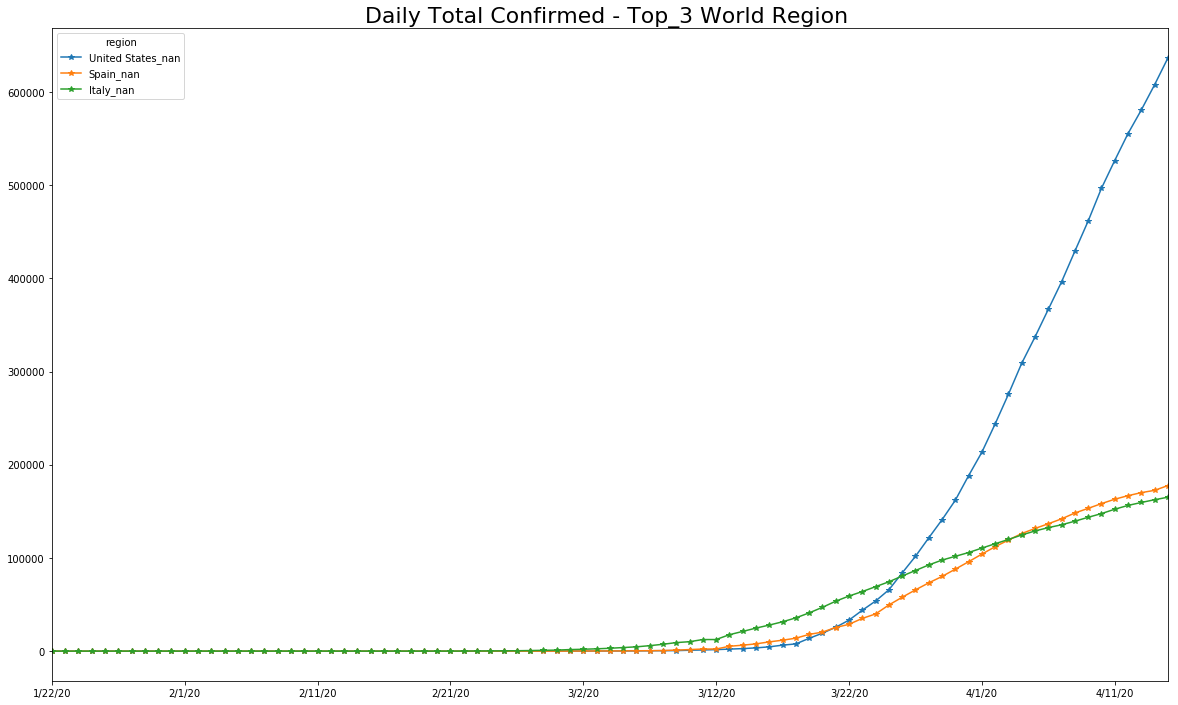

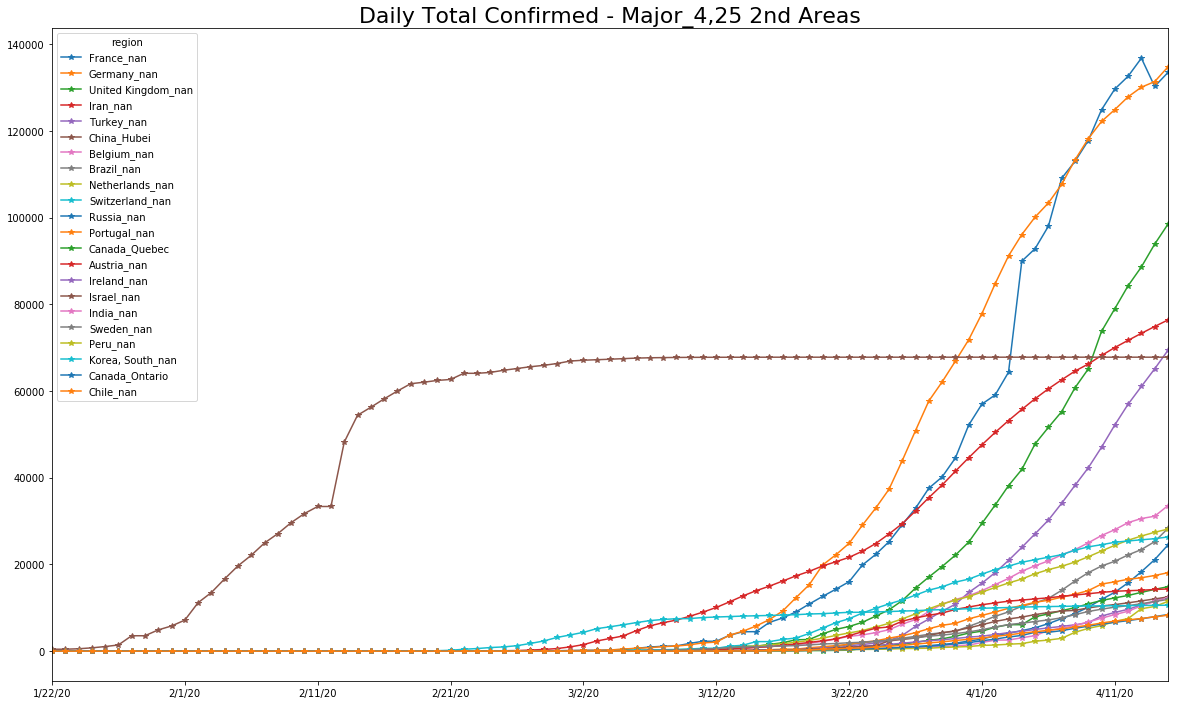

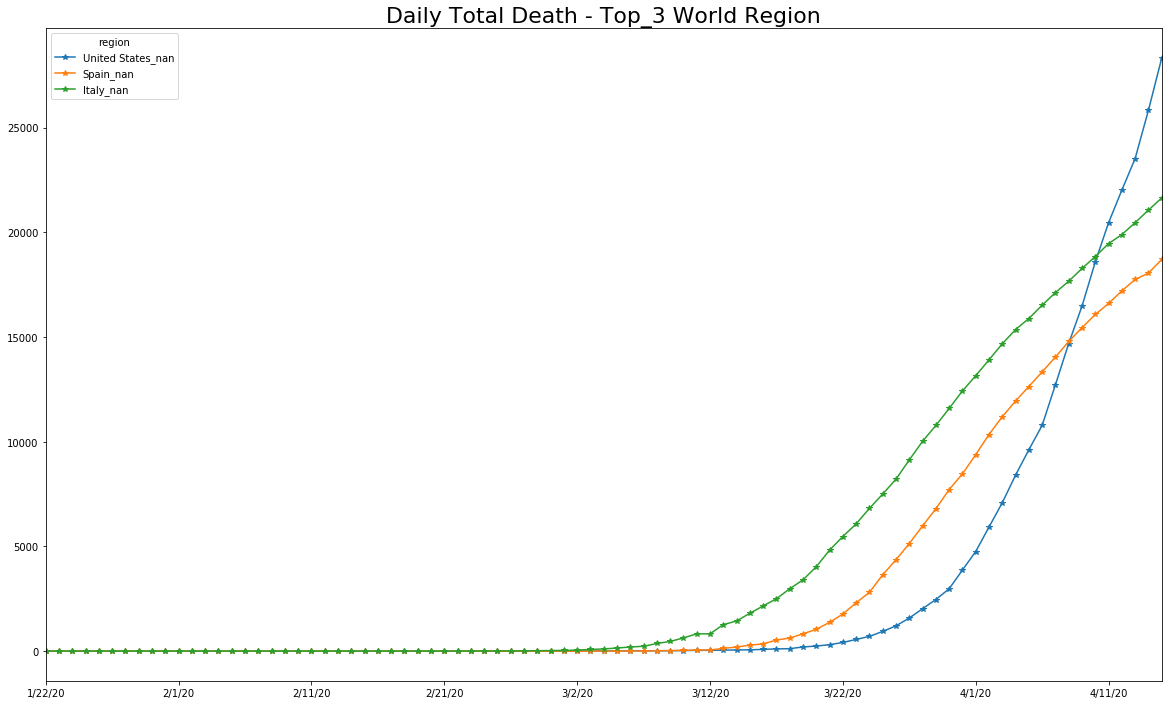

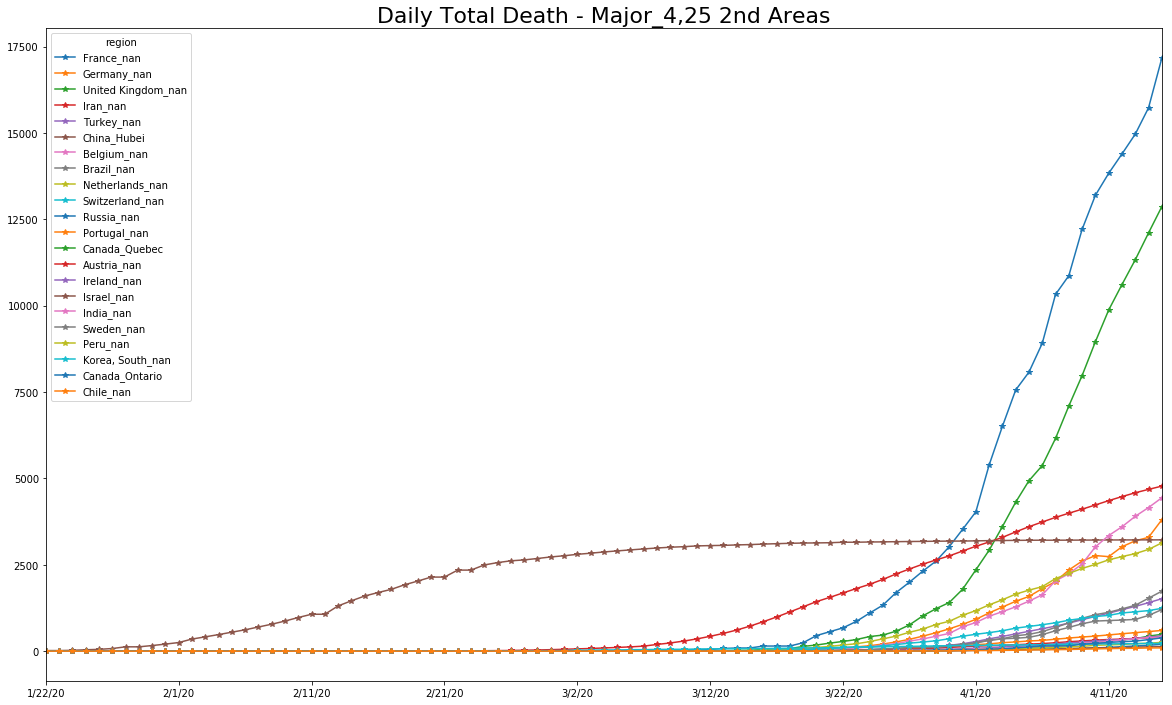

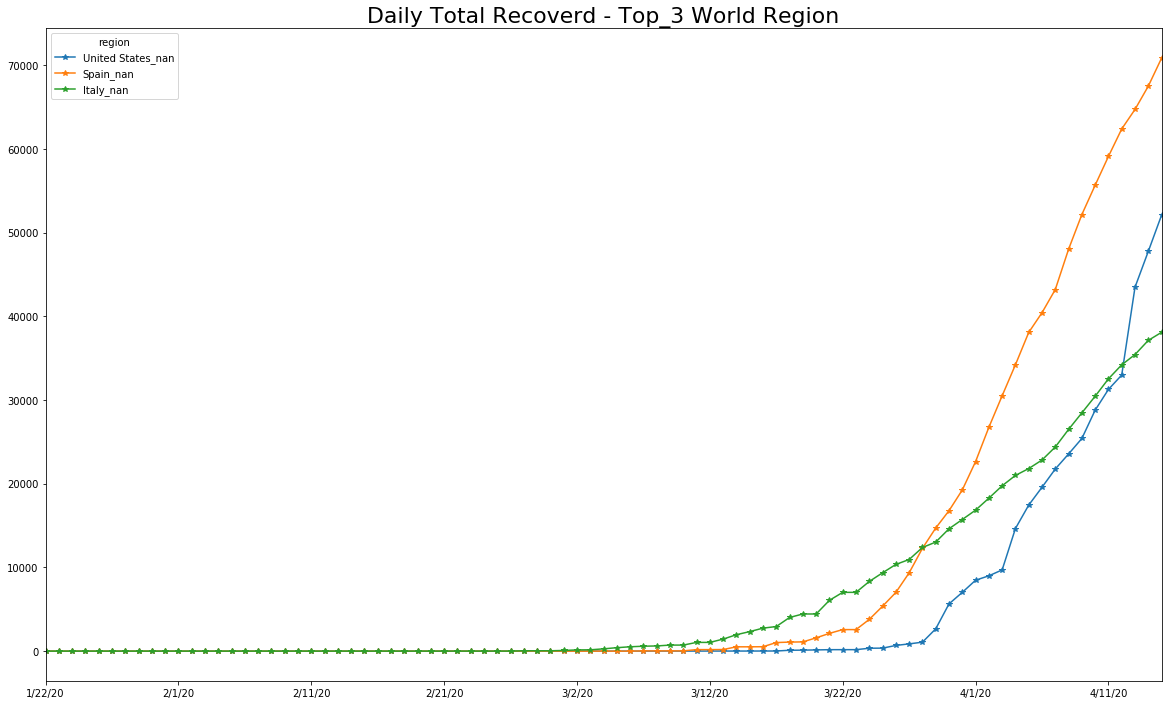

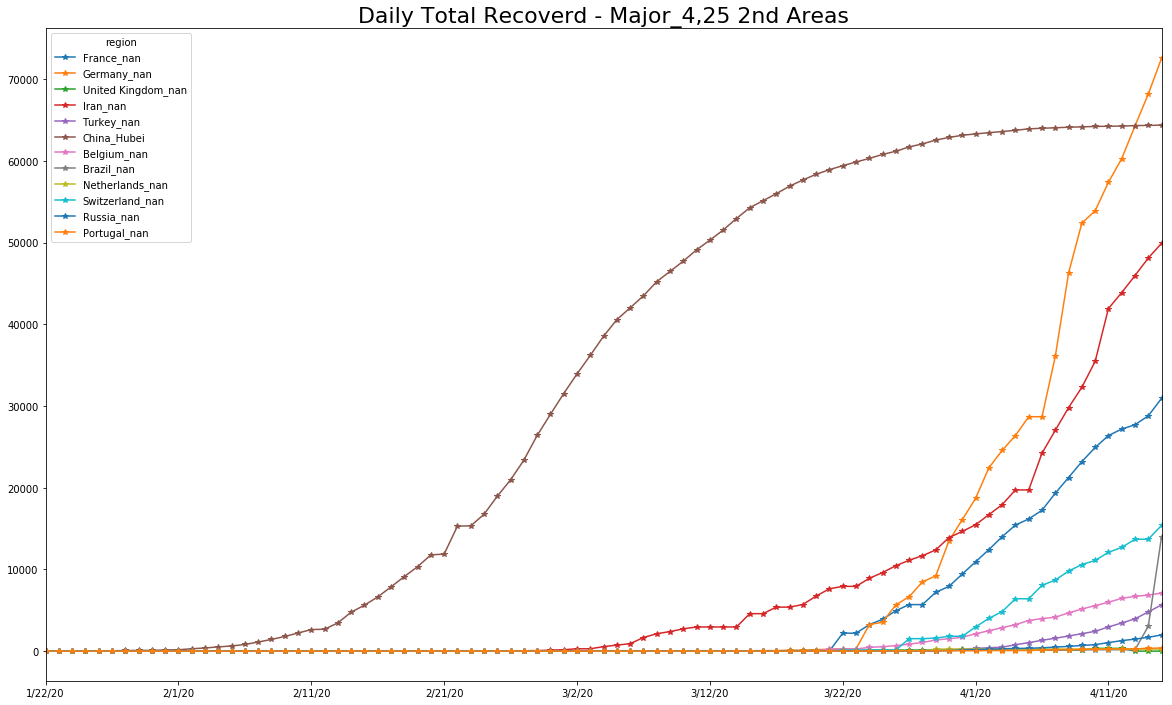

In [12]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Death - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Total Death - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Recoverd - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:15].plot(marker='*',figsize=(20,12)).set_title('Daily Total Recoverd - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [13]:

#!pip install pyweatherbit

In [14]:

from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#api_key="30b114eb7ebb45069cd287adadf9d3b7" # joao@fuelbigdata.com
#api_key="257c03d853ec4a9db6bd4920be591f3c" # jpacerqueira.consult.bigdata@gmail.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090"

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [15]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Taiwan*_nan',
        'Turkey_nan', 
        'Vietnam_nan',
       ]
#

#### Weather History

In [16]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init='2020-04-16'
offset_days=0 #-1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=31



w=pd.DataFrame(columns=['date','region','min','max'])
for h in range(0,max_days):
    offset_days=h
    start_date=pd.to_datetime(start_date_init)
    #
    end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
    start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
    prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
    prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
    #
    for i in range (1,len(confirmed)):
        if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
            continue
        if confirmed.iloc[i,vpos] in my_weather_fetch_list:
            #
            # Clean JSON structure return from API Call
            jas=""
            jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
            if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                 or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                continue
            try:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
            except Exception:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
#        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan


KeyError: 'min_temp'

In [17]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [18]:
w[:]

date                     region   min   max
0   2020/04/17  Australia_New South Wales  18.4  26.3
1   2020/04/17                Belgium_nan   2.8  13.9
2   2020/04/17                 Brazil_nan  19.4  21.1
3   2020/04/17             Canada_Ontario -11.4  -7.9
4   2020/04/17              Canada_Quebec -13.0 -13.0
5   2020/04/17              China_Beijing  10.0  20.0
6   2020/04/17            China_Guangdong  18.0  29.0
7   2020/04/17            China_Hong Kong  17.2  24.4
8   2020/04/17                China_Hubei  18.0  29.0
9   2020/04/17                China_Macau  18.0  24.0
10  2020/04/17             China_Shanghai  15.8  26.0
11  2020/04/17                Finland_nan  -1.7  -0.6
12  2020/04/17                Finland_nan  -1.7  -0.6
13  2020/04/17                 France_nan  10.5  17.6
14  2020/04/17                Germany_nan   0.0   7.0
15  2020/04/17                  India_nan  24.0  37.0
16  2020/04/17                   Iran_nan   6.0  15.1
17  2020/04/17                  Italy_nan   4.1  11.5
18  2020/04/17                  Japan_nan   2.4  15.3
19  2020/04/17           Korea, South_nan   3.0  23.0
20  2020/04/17               Malaysia_nan  25.0  32.0
21  2020/04/17            Netherlands_nan  10.0  13.9
22  2020/04/17                 Norway_nan  -5.0   0.0
23  2020/04/17            Philippines_nan  23.9  31.7
24  2020/04/17                 Poland_nan   3.9  11.7
25  2020/04/17               Portugal_nan  13.0  13.7
26  2020/04/17                 Russia_nan   5.0  12.0
27  2020/04/17              Singapore_nan  27.0  34.0
28  2020/04/17                  Spain_nan   9.1  12.9
29  2020/04/17                 Sweden_nan   2.8   6.7
30  2020/04/17            Switzerland_nan   6.9  12.1
31  2020/04/17                Taiwan*_nan  16.0  27.0
32  2020/04/17                 Turkey_nan   6.2  14.3
33  2020/04/17         United Kingdom_nan   3.3   7.2
34  2020/04/17          United States_nan   6.2   8.2
35  2020/04/17                Vietnam_nan  24.0  31.0

In [19]:

# ################## Forecast Weather With API - Already Done
# #forecast = api.get_forecast(lat=lat, lon=lon)

# w_forecast=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
# for i in range (0,len(confirmed)):
#     jas=api.get_forecast(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3]).json
#     jas=json_normalize(jas['data'])[['datetime','min_temp','max_temp']]
#     try:
#       w_forecast_temp=jas
#       w_forecast_temp['region']=confirmed.iloc[i,confirmed.shape[1]-1]
#     except Exception:
#       w_forecast_temp=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
#     w_forecast=w_forecast.append(w_forecast_temp)
# w_forecast=w_forecast[['datetime','region','min_temp','max_temp']]
# w_forecast.columns = ['date', 'region', 'min', 'max']
# w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%Y-%m-%d')

## Kalman Filter With R

In [20]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan and Feb < 20/02 as
### they are too in the Past and model no longuer trains in China Hubei

#ts=ts[29:]
#ts_d=ts_d[29:]
#ts_rec=ts_rec[29:]

In [21]:
ts[-4:-1]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
4/12/20              607          446         1914          638          19   
4/13/20              665          467         1983          646          19   
4/14/20              714          475         2070          659          19   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
4/12/20                       21           2142         1013   
4/13/20                       23           2208         1039   
4/14/20                       23           2277         1067   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
4/12/20                                     103                       2857   
4/13/20                                     102                       2863   
4/14/20                                     103                       2870   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
4/12/20  ...             555313          480             865            181   
4/13/20  ...             580619          480             998            189   
4/14/20  ...             607670          483            1165            189   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
4/12/20          262                     290                   6          1   
4/13/20          265                     308                   6          1   
4/14/20          266                     308                   6          1   

region   Zambia_nan  Zimbabwe_nan  
4/12/20          43            14  
4/13/20          45            17  
4/14/20          45            17  

[3 rows x 264 columns]

In [22]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [23]:
#!pip install rpy2


In [24]:
import rpy2
%load_ext rpy2.ipython

In [25]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')


NULL


In [26]:
%%R
Sys.setenv(TZ='GMT')
Sys.timezone()


[1] "GMT"


In [27]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [28]:
p=%R pred_all

In [29]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [30]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

#w_1_total=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_total.csv', sep=',', encoding='latin1')
#w_1_total['date']=pd.to_datetime(w_1_total['date'],format='%Y/%m/%d')
w_v2_v2=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

In [31]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2) # w_1_total.append(w_v2) #
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [32]:
w_in_model=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [33]:
w_in_model.tail(2)

date       region   min   max
6059 2020-04-16  Vietnam_nan  23.0  29.0
6060 2020-04-17  Vietnam_nan  24.0  31.0

### Build Train Set Data Structure

In [34]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [35]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2] +1)/(t.iloc[i-2,2]-1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2] +1)/(t.iloc[i-4,2]-1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2] +1)/(t.iloc[i-8,2]-1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10)
#
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app


In [36]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
34    2020-02-25  Afghanistan_nan          1             1             1   
35    2020-02-26  Afghanistan_nan          1             0             1   
36    2020-02-27  Afghanistan_nan          1             0             1   
37    2020-02-28  Afghanistan_nan          1             0             0   
38    2020-02-29  Afghanistan_nan          1             0             0   
39    2020-03-01  Afghanistan_nan          1             0             0   
40    2020-03-02  Afghanistan_nan          1             0             0   
41    2020-03-03  Afghanistan_nan          1             0             0   
42    2020-03-04  Afghanistan_nan          1             0             0   
43    2020-03-05  Afghanistan_nan          1             0             0   
44    2020-03-06  Afghanistan_nan          1             0             0   
45    2020-03-07  Afghanistan_nan          1             0             0   
46    2020-03-08  Afghanistan_nan          4             0             0   
47    2020-03-09  Afghanistan_nan          4             3             3   
48    2020-03-10  Afghanistan_nan          5             0             3   
49    2020-03-11  Afghanistan_nan          7             1             4   
50    2020-03-12  Afghanistan_nan          7             2             3   
51    2020-03-13  Afghanistan_nan          7             0             3   
52    2020-03-14  Afghanistan_nan         11             0             2   
53    2020-03-15  Afghanistan_nan         16             4             4   
54    2020-03-16  Afghanistan_nan         21             5             9   
55    2020-03-17  Afghanistan_nan         22             5            14   
56    2020-03-18  Afghanistan_nan         22             1            11   
57    2020-03-19  Afghanistan_nan         22             0             6   
58    2020-03-20  Afghanistan_nan         24             0             1   
59    2020-03-21  Afghanistan_nan         24             2             2   
60    2020-03-22  Afghanistan_nan         40             0             2   
61    2020-03-23  Afghanistan_nan         40            16            18   
62    2020-03-24  Afghanistan_nan         74             0            16   
63    2020-03-25  Afghanistan_nan         84            34            50   
...          ...              ...        ...           ...           ...   
22873 2020-04-14       Zambia_nan         45             2             5   
22874 2020-04-15       Zambia_nan         48             0             5   
22875 2020-04-16       Zambia_nan          0             3             5   
22935 2020-03-21     Zimbabwe_nan          3             1             1   
22936 2020-03-22     Zimbabwe_nan          3             2             3   
22937 2020-03-23     Zimbabwe_nan          3             0             3   
22938 2020-03-24     Zimbabwe_nan          3             0             2   
22939 2020-03-25     Zimbabwe_nan          3             0             0   
22940 2020-03-26     Zimbabwe_nan          3             0             0   
22941 2020-03-27     Zimbabwe_nan          5             0             0   
22942 2020-03-28     Zimbabwe_nan          7             2             2   
22943 2020-03-29     Zimbabwe_nan          7             2             4   
22944 2020-03-30     Zimbabwe_nan          7             0             4   
22945 2020-03-31     Zimbabwe_nan          8             0             2   
22946 2020-04-01     Zimbabwe_nan          8             1             1   
22947 2020-04-02     Zimbabwe_nan          9             0             1   
22948 2020-04-03     Zimbabwe_nan          9             1             2   
22949 2020-04-04     Zimbabwe_nan          9             0             1   
22950 2020-04-05     Zimbabwe_nan          9             0             1   
22951 2020-04-06     Zimbabwe_nan         10             0             0   
22952 2020-04-07     Zimbabwe_nan         11             1  

In [37]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [38]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]

date           region  confirmed  1_day_change  3_day_change  \
0     2020-01-22  Afghanistan_nan          0             0             0   
1     2020-01-23  Afghanistan_nan          0             0             0   
2     2020-01-24  Afghanistan_nan          0             0             0   
3     2020-01-25  Afghanistan_nan          0             0             0   
4     2020-01-26  Afghanistan_nan          0             0             0   
5     2020-01-27  Afghanistan_nan          0             0             0   
6     2020-01-28  Afghanistan_nan          0             0             0   
7     2020-01-29  Afghanistan_nan          0             0             0   
8     2020-01-30  Afghanistan_nan          0             0             0   
9     2020-01-31  Afghanistan_nan          0             0             0   
10    2020-02-01  Afghanistan_nan          0             0             0   
11    2020-02-02  Afghanistan_nan          0             0             0   
12    2020-02-03  Afghanistan_nan          0             0             0   
13    2020-02-04  Afghanistan_nan          0             0             0   
14    2020-02-05  Afghanistan_nan          0             0             0   
15    2020-02-06  Afghanistan_nan          0             0             0   
16    2020-02-07  Afghanistan_nan          0             0             0   
17    2020-02-08  Afghanistan_nan          0             0             0   
18    2020-02-09  Afghanistan_nan          0             0             0   
19    2020-02-10  Afghanistan_nan          0             0             0   
20    2020-02-11  Afghanistan_nan          0             0             0   
21    2020-02-12  Afghanistan_nan          0             0             0   
22    2020-02-13  Afghanistan_nan          0             0             0   
23    2020-02-14  Afghanistan_nan          0             0             0   
24    2020-02-15  Afghanistan_nan          0             0             0   
25    2020-02-16  Afghanistan_nan          0             0             0   
26    2020-02-17  Afghanistan_nan          0             0             0   
86    2020-01-22      Albania_nan          0             0             0   
87    2020-01-23      Albania_nan          0             0             0   
88    2020-01-24      Albania_nan          0             0             0   
...          ...              ...        ...           ...           ...   
22932 2020-03-18     Zimbabwe_nan          0             0             0   
22933 2020-03-19     Zimbabwe_nan          0             0             0   
22934 2020-03-20     Zimbabwe_nan          1             0             0   
22935 2020-03-21     Zimbabwe_nan          3             1             1   
22936 2020-03-22     Zimbabwe_nan          3             2             3   
22937 2020-03-23     Zimbabwe_nan          3             0             3   
22938 2020-03-24     Zimbabwe_nan          3             0             2   
22939 2020-03-25     Zimbabwe_nan          3             0             0   
22940 2020-03-26     Zimbabwe_nan          3             0             0   
22941 2020-03-27     Zimbabwe_nan          5             0             0   
22942 2020-03-28     Zimbabwe_nan          7             2             2   
22943 2020-03-29     Zimbabwe_nan          7             2             4   
22944 2020-03-30     Zimbabwe_nan          7             0             4   
22945 2020-03-31     Zimbabwe_nan          8             0             2   
22946 2020-04-01     Zimbabwe_nan          8             1             1   
22947 2020-04-02     Zimbabwe_nan          9             0             1   
22948 2020-04-03     Zimbabwe_nan          9             1             2   
22949 2020-04-04     Zimbabwe_nan          9             0             1   
22950 2020-04-05     Zimbabwe_nan          9             0             1   
22951 2020-04-06     Zimbabwe_nan         10             0             0   
22952 2020-04-07     Zimbabwe_nan         11             1  

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse           mae
254  United States_nan  5.274213e+09  72623.774592  10709.352941


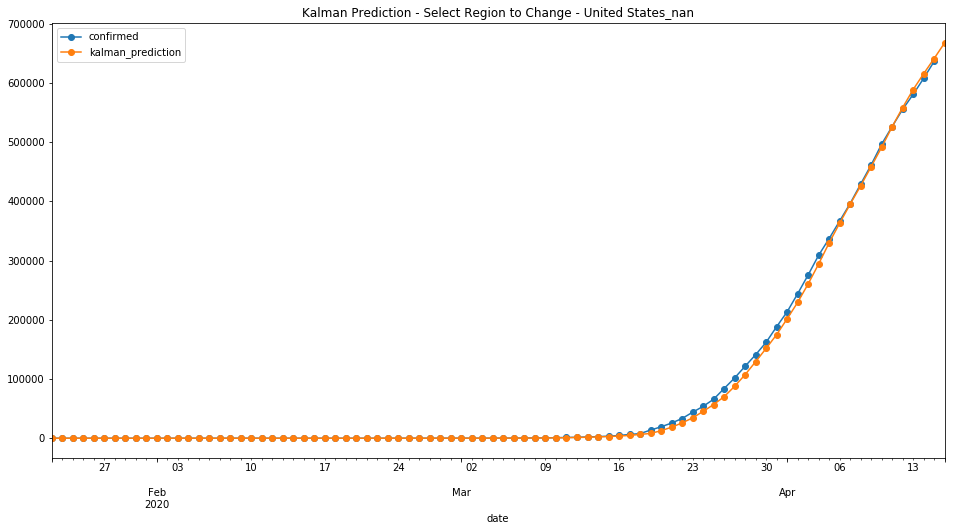

In [39]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region          mse         rmse          mae
149  Italy_nan  339794622.0  18433.51898  2692.588235


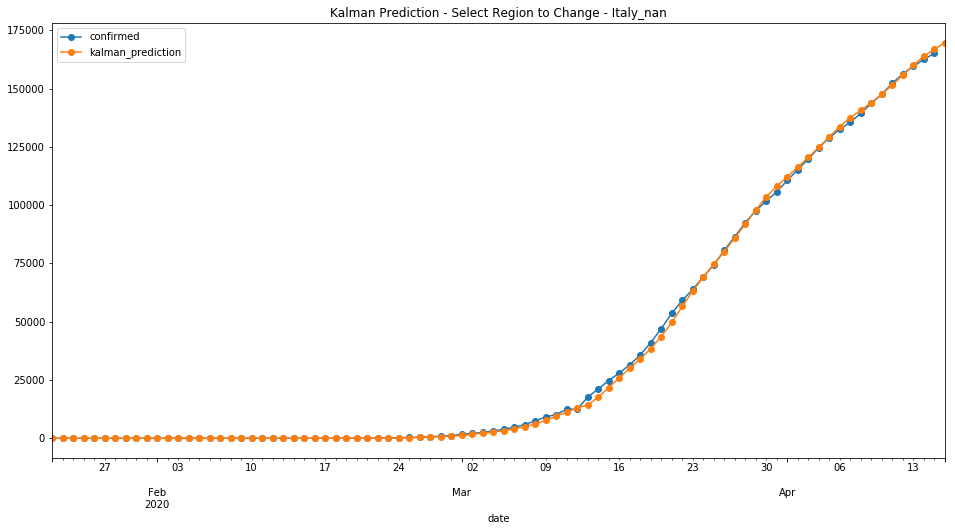

In [40]:
### JOAO - ERROR - ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# Select region
region='Italy_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse          mae
225  Spain_nan  3.923358e+08  19807.469478  3109.682353


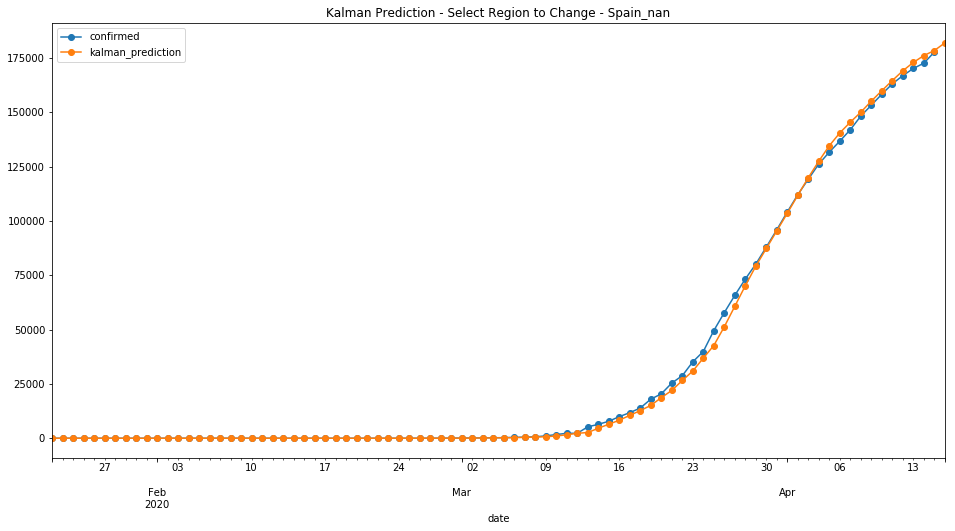

In [41]:
# Select region
region='Spain_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region          mse          rmse          mae
253  United Kingdom_nan  129195010.2  11366.398295  1723.376471


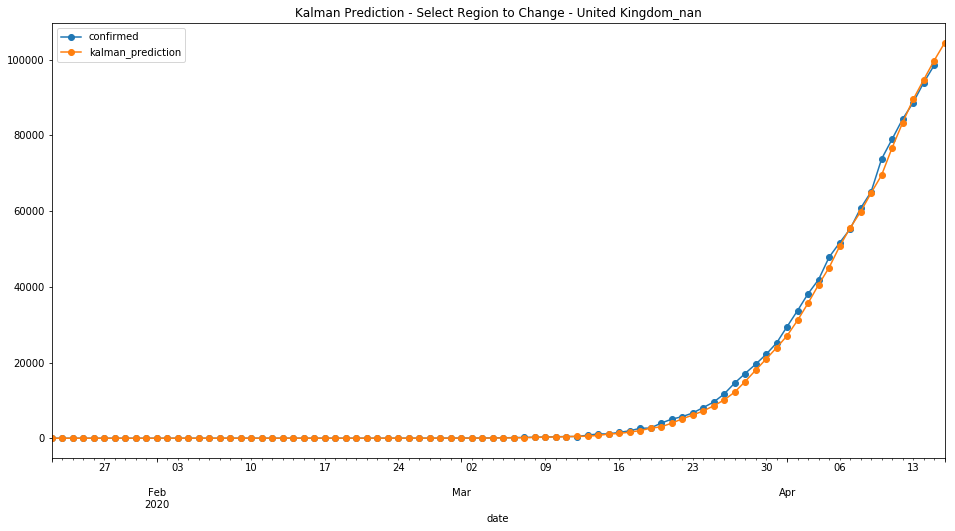

In [42]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

          region           mse          rmse     mae
130  Germany_nan  2.267120e+08  15056.957087  2395.4


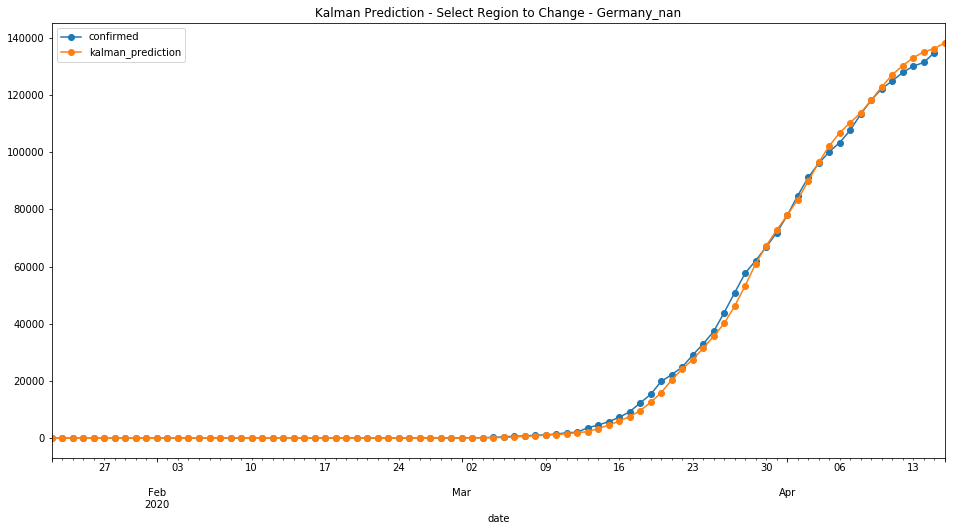

In [43]:
# Select region
region='Germany_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse          mae
126  France_nan  2.384493e+08  15441.802844  2953.988235


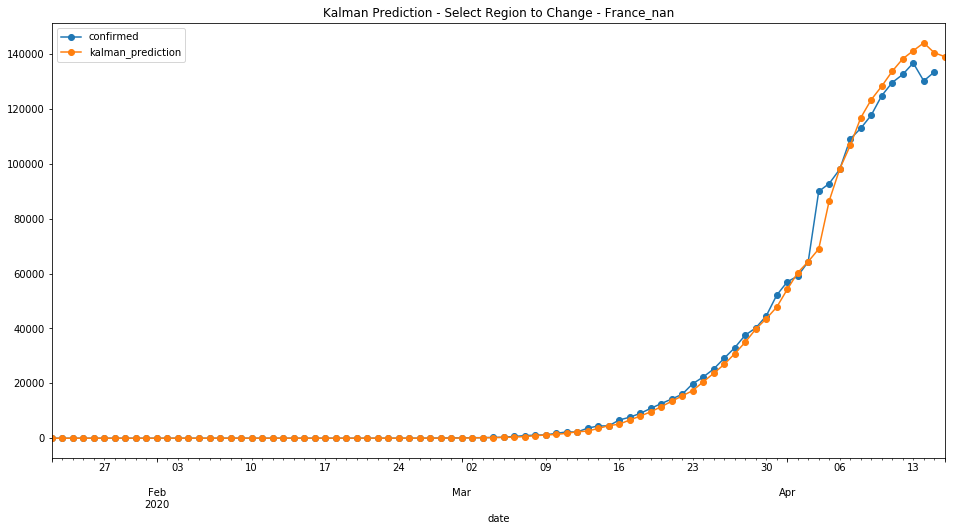

In [44]:
# Select region
region='France_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

              region        mse         rmse         mae
230  Switzerland_nan  8598519.2  2932.323175  472.376471


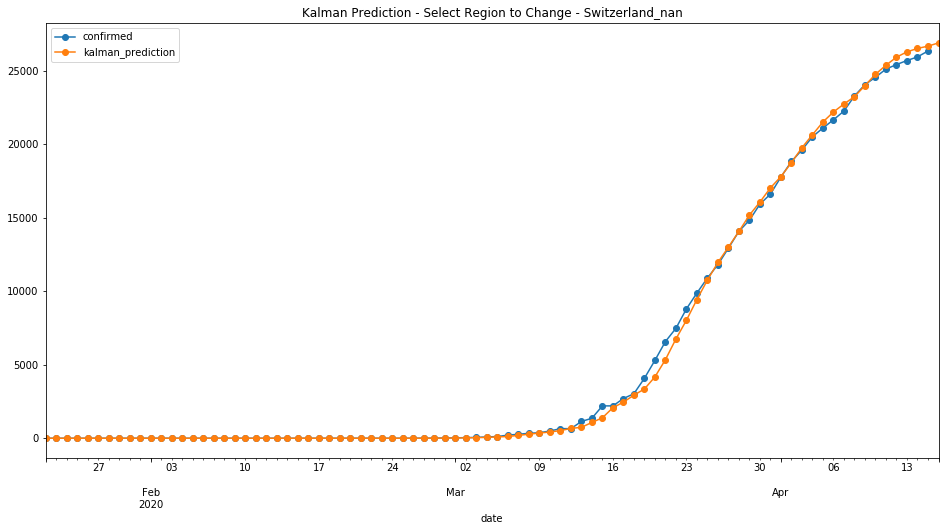

In [45]:
# Select region
region='Switzerland_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse         rmse         mae
16  Austria_nan  2.553227e+06  1597.881977  285.964706


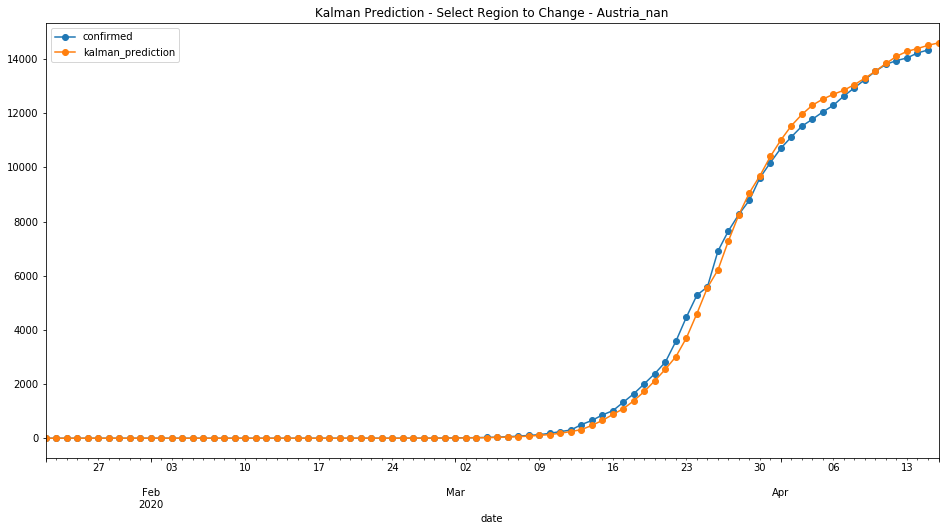

In [46]:
# Select region
region='Austria_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse         rmse          mae
239  Turkey_nan  6.515637e+07  8071.949444  1245.658824


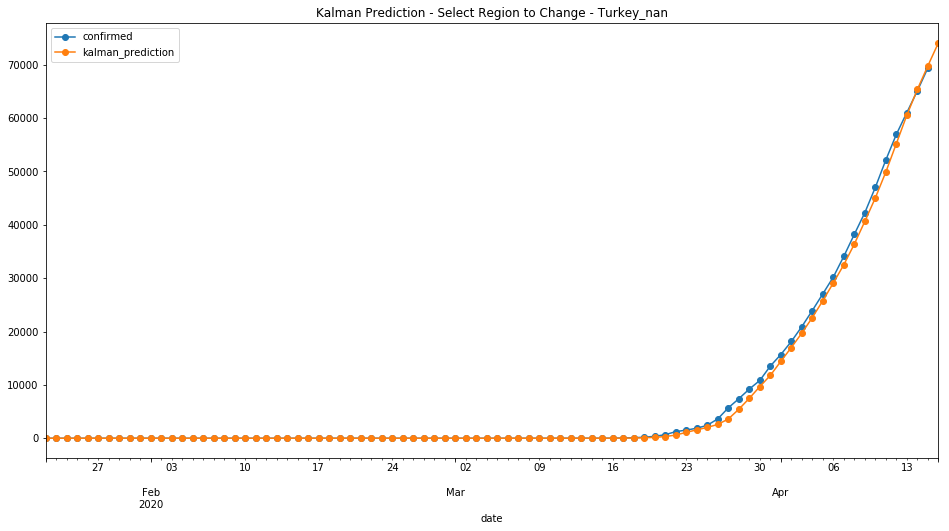

In [47]:
# Select region
region='Turkey_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse         rmse         mae
30  Brazil_nan  1.020413e+07  3194.390987  510.882353


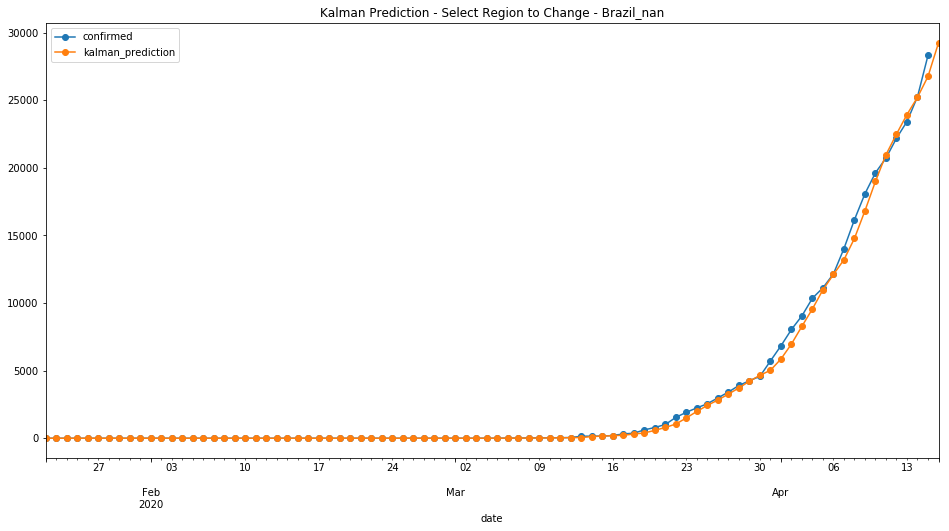

In [48]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

           region           mse         rmse    mae
204  Portugal_nan  4.229988e+06  2056.693569  329.8


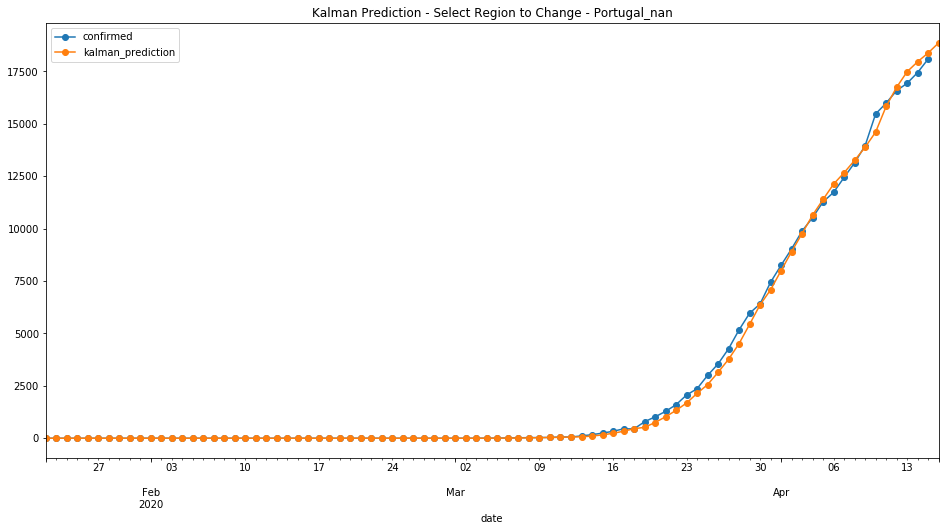

In [49]:
# Select region
region='Portugal_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

               region           mse        rmse         mae
155  Korea, South_nan  1.370221e+06  1170.56456  236.635294


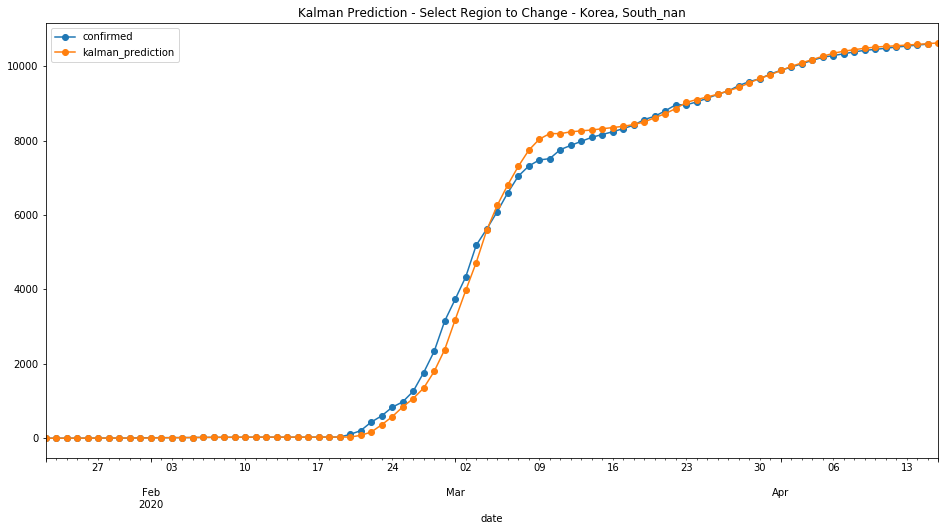

In [50]:
# Select region
region='Korea, South_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

       region           mse         rmse          mae
145  Iran_nan  7.243316e+07  8510.767532  1297.941176


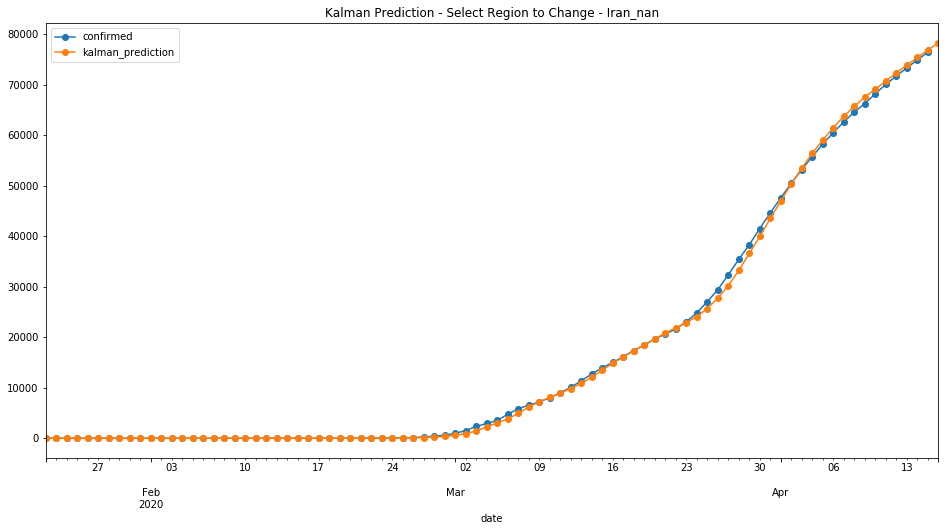

In [51]:
# Select region
region='Iran_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse         rmse         mae
229  Sweden_nan  1.834404e+06  1354.401548  209.011765


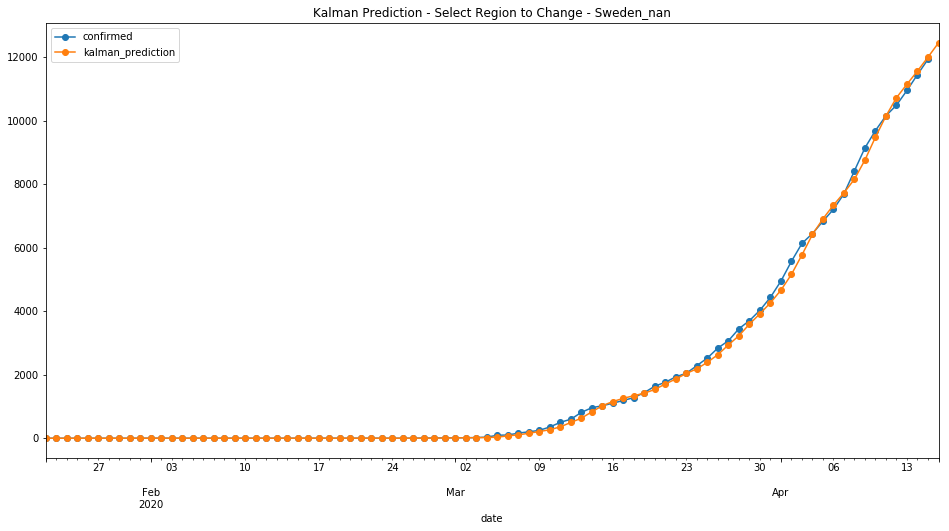

In [52]:
# Select region
region='Sweden_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

              region           mse         rmse         mae
189  Netherlands_nan  1.027720e+07  3205.807135  470.070588


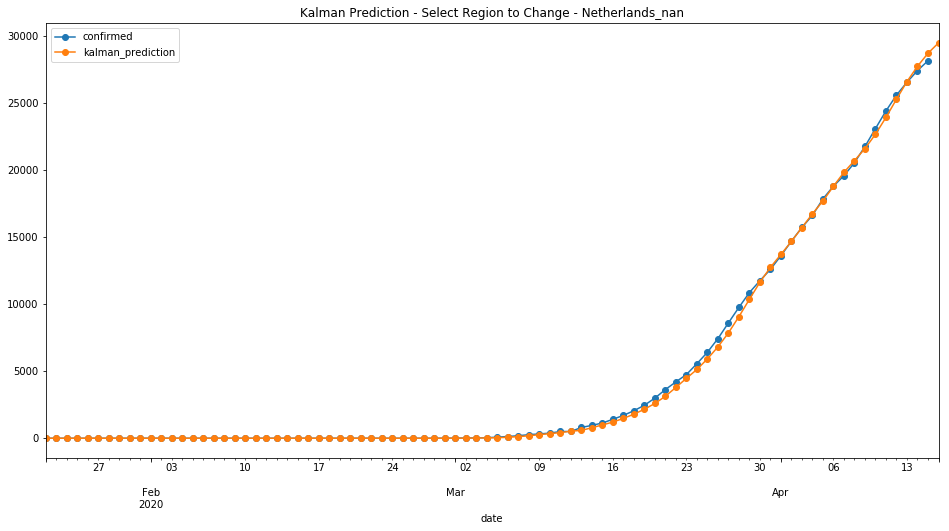

In [53]:
# Select region
region='Netherlands_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

            region            mse        rmse         mae
48  Canada_Ontario  933718.023529  966.290859  150.729412


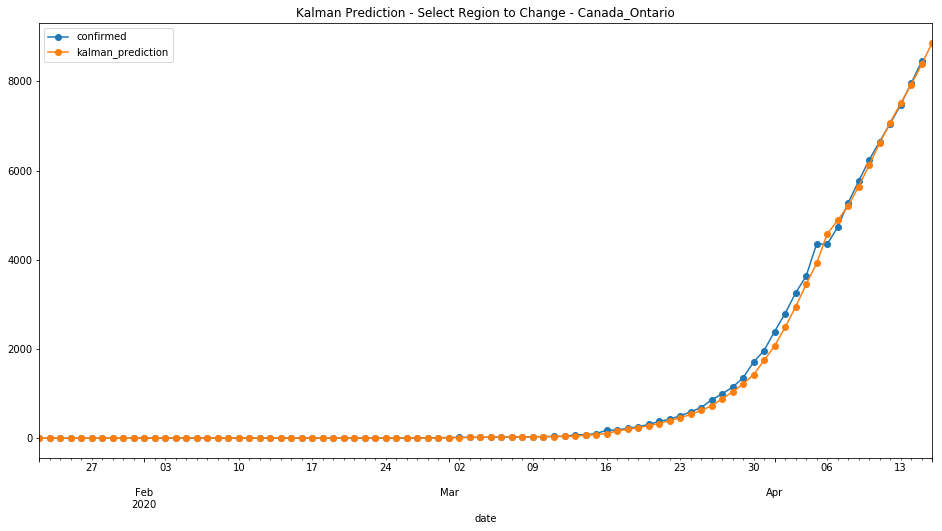

In [54]:
# Select region
region='Canada_Ontario'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

           region           mse         rmse         mae
50  Canada_Quebec  2.902971e+06  1703.810705  273.317647


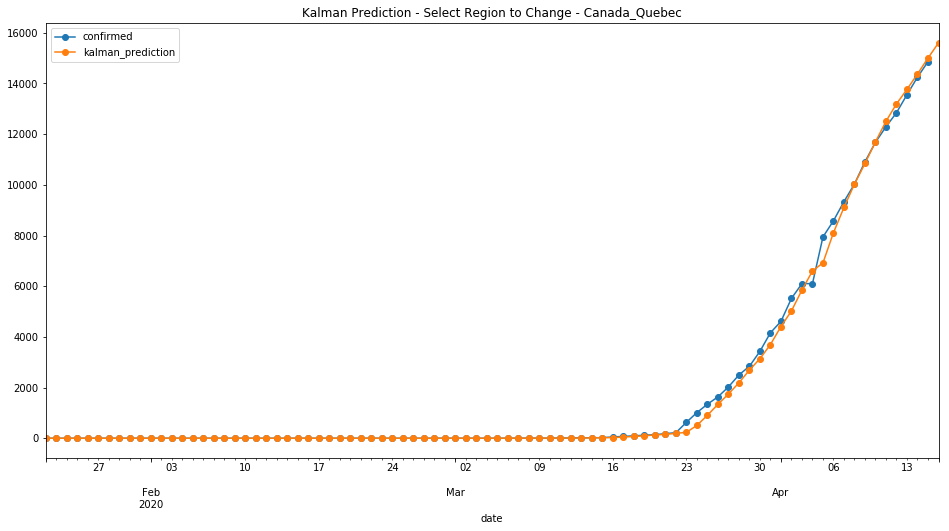

In [55]:
# Select region
region='Canada_Quebec'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [56]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='6G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpyfz4lo22
  JVM stdout: /tmp/tmpyfz4lo22/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpyfz4lo22/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 5 months and 20 days !!!
H2O cluster name:           H2O_from_python_unknownUser_ztyqpj
H2O cluster total nodes:    1
H2O cluster free memory:    6 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [57]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Taiwan*_nan',
        'Turkey_nan', 
        'Vietnam_nan',
       ]
#

In [58]:
train=train.fillna(0) 

###train_df=train[train['date']<'2020-02-17']
###boots=train_df[train_df['date']>='2020-02-14'] # some bootstrap to give more weight for recent days
###train_df=train_df.append([boots[boots['date']>='2020-02-14']]*1000,ignore_index=True)
###train_df_hubei=train_df[train_df['region']=='China_Hubei']
###test=train[train['date']>='2020-02-17']
###test=test[test['date']<'2020-02-19']
###
### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward
train_df=train[train['date']>'2020-03-04']
train_df=train[train['date']<'2020-04-16']
boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>='2020-04-03']
test=test[test['date']<'2020-04-17']
test_v2=test[test['region'].isin(region_to_train)]

In [59]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'kalman_prediction',
            'infected_rate', 'min', 'max'
          ]

In [60]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [61]:
pred2.iloc[175:195]

0  confirmed       date                     region
175  418.0        428 2020-04-10  Australia_South Australia
176  420.0        429 2020-04-11  Australia_South Australia
177  422.0        429 2020-04-12  Australia_South Australia
178  423.0        429 2020-04-13  Australia_South Australia
179  420.0        433 2020-04-14  Australia_South Australia
180  426.0        433 2020-04-15  Australia_South Australia
181  427.0          0 2020-04-16  Australia_South Australia
182   75.0         74 2020-04-03         Australia_Tasmania
183   80.0         80 2020-04-04         Australia_Tasmania
184   81.0         82 2020-04-05         Australia_Tasmania
185   84.0         86 2020-04-06         Australia_Tasmania
186   90.0         89 2020-04-07         Australia_Tasmania
187   92.0         98 2020-04-08         Australia_Tasmania
188  103.0        111 2020-04-09         Australia_Tasmania
189  121.0        122 2020-04-10         Australia_Tasmania
190  136.0        133 2020-04-11         Australia_Tasmania
191  145.0        133 2020-04-12         Australia_Tasmania
192  147.0        144 2020-04-13         Australia_Tasmania
193  152.0        165 2020-04-14         Australia_Tasmania
194  178.0        165 2020-04-15         Australia_Tasmania

In [62]:
pred2.iloc[220:240]

0  confirmed       date                       region
220    526.0        517 2020-04-13  Australia_Western Australia
221    526.0        527 2020-04-14  Australia_Western Australia
222    540.0        527 2020-04-15  Australia_Western Australia
223    540.0          0 2020-04-16  Australia_Western Australia
224  11519.0      11524 2020-04-03                  Austria_nan
225  11835.0      11781 2020-04-04                  Austria_nan
226  12097.0      12051 2020-04-05                  Austria_nan
227  12355.0      12297 2020-04-06                  Austria_nan
228  12478.0      12639 2020-04-07                  Austria_nan
229  12806.0      12942 2020-04-08                  Austria_nan
230  13142.0      13244 2020-04-09                  Austria_nan
231  13455.0      13555 2020-04-10                  Austria_nan
232  13751.0      13806 2020-04-11                  Austria_nan
233  14041.0      13945 2020-04-12                  Austria_nan
234  14168.0      14041 2020-04-13                  Austria_nan
235  14210.0      14226 2020-04-14                  Austria_nan
236  14310.0      14336 2020-04-15                  Austria_nan
237  14438.0          0 2020-04-16                  Austria_nan
238    469.0        443 2020-04-03               Azerbaijan_nan
239    498.0        521 2020-04-04               Azerbaijan_nan

In [63]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time

training_columns = ['region','1_day_change', '3_day_change', '7_day_change', '1_day_change_rate', '3_day_change_rate',
                    '7_day_change_rate', 'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
                   ]                 
# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2

model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=17)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2)

test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [64]:
#Print Model
print('auc', model_v2.auc(valid=True))
print('logloss', model_v2.logloss(valid=True))
print('mse',model_v2.mse(valid=True))
print('rmse',model_v2.rmse(valid=True))

auc None
logloss None
mse None
rmse None


In [65]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0        7_day_change         2.227212e+17           1.000000    0.310714
1   kalman_prediction         1.803954e+17           0.809961    0.251666
2            last_day         1.327772e+17           0.596159    0.185235
3        3_day_change         7.880371e+16           0.353822    0.109938
4        1_day_change         5.242864e+16           0.235400    0.073142
5              region         4.047792e+16           0.181743    0.056470
6       infected_rate         7.472428e+15           0.033551    0.010425
7                 min         6.397905e+14           0.002873    0.000893
8   1_day_change_rate         3.351868e+14           0.001505    0.000468
9   7_day_change_rate         3.318508e+14           0.001490    0.000463
10                max         2.681769e+14           0.001204    0.000374
11  3_day_change_rate         1.526229e+14           0.000685    0.000213

In [66]:
# # Model performance
# performance = model_hubei.model_performance(test_data=test_h20_hubei)
# # Model Create Predictions
# pred=model_hubei.predict(test_h20_hubei);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
# pred['confirmed']=test_hubei['confirmed'].values
# pred['date']=test_hubei['date'].values
# pred['region']=test_hubei['region'].values

# pred2=model.predict(test_h20);pred2=pred2.as_data_frame(); pred2=round(pred2)
# pred2['confirmed']=test['confirmed'].values
# pred2['date']=test['date'].values
# pred2['region']=test['region'].values
# pred=pred.append(pred2)

## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


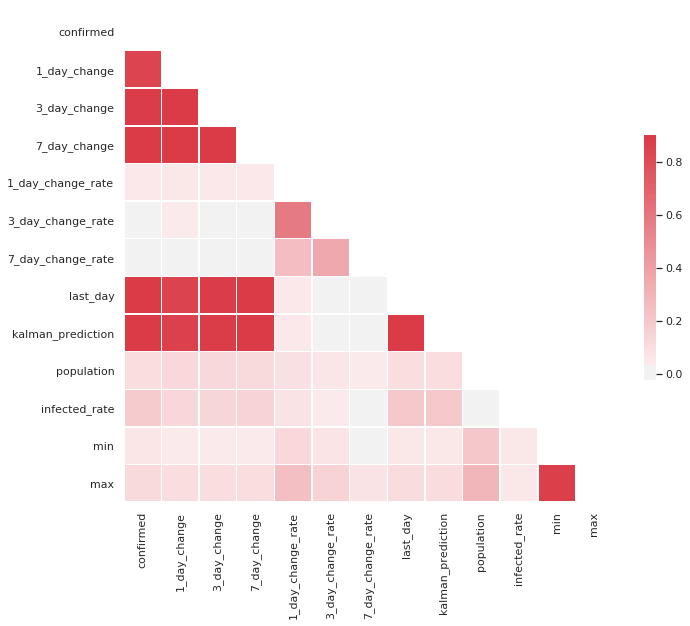

In [67]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [68]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.847824
3_day_change         0.884879
7_day_change         0.910014
1_day_change_rate    0.047732
3_day_change_rate    0.024637
7_day_change_rate    0.008382
last_day             0.942033
kalman_prediction    0.943402
population           0.106007
infected_rate        0.190051
min                  0.057319
max                  0.118052
Name: confirmed, dtype: float64


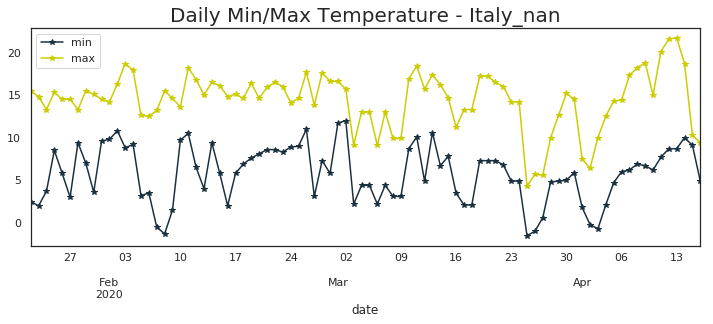

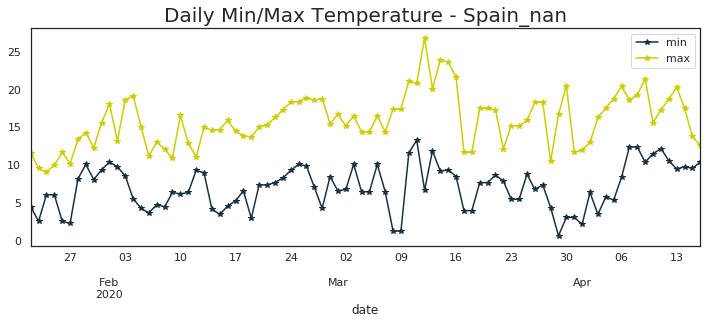

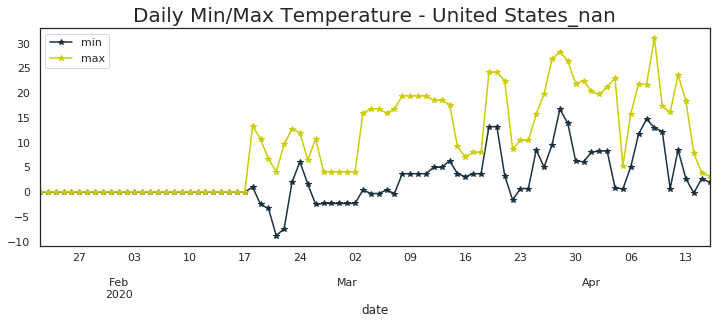

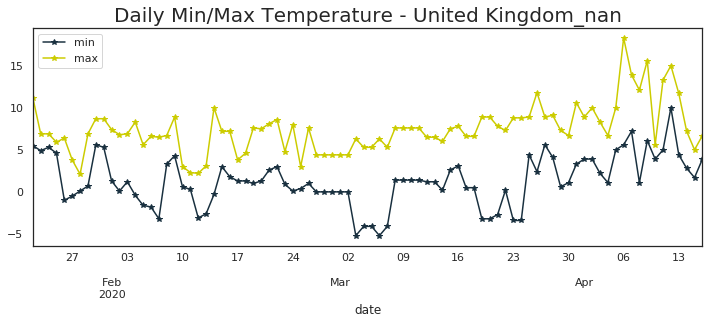

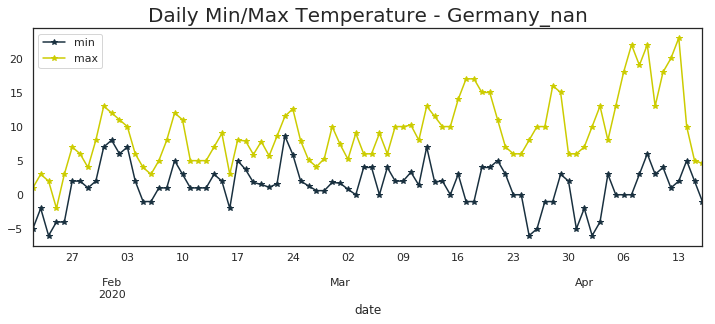

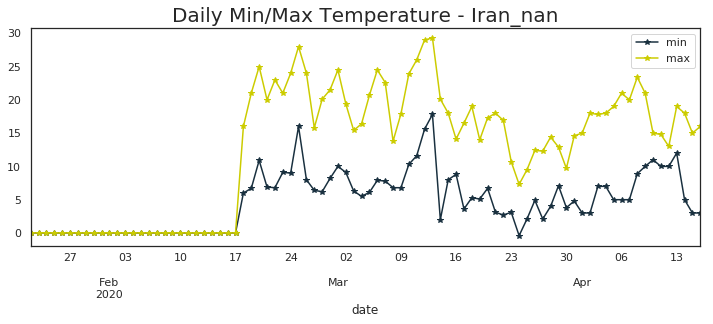

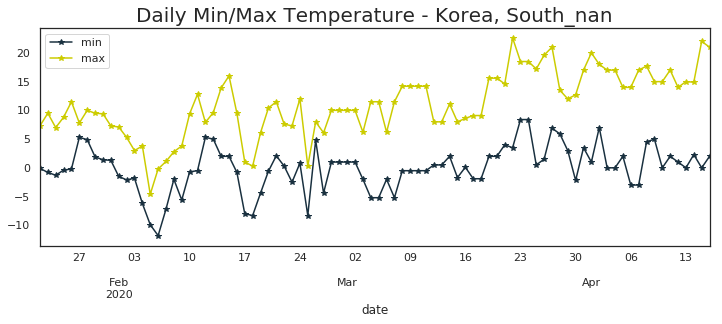

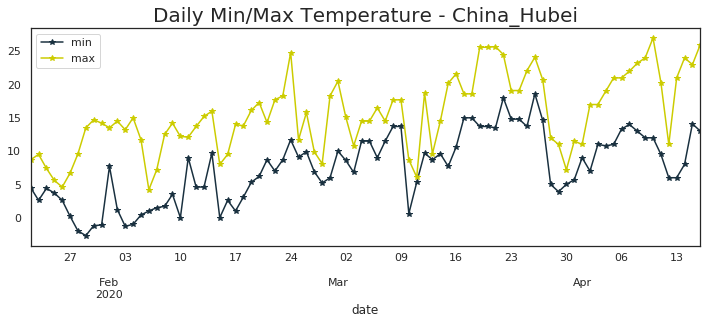

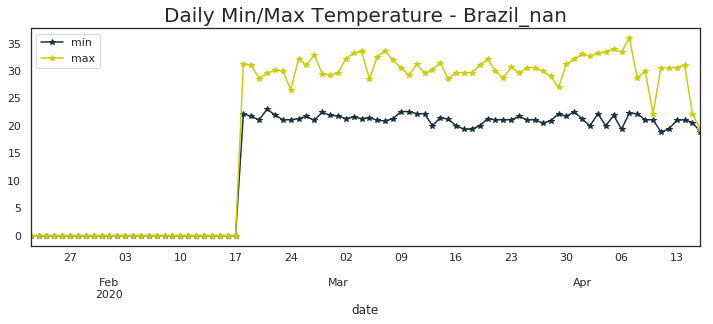

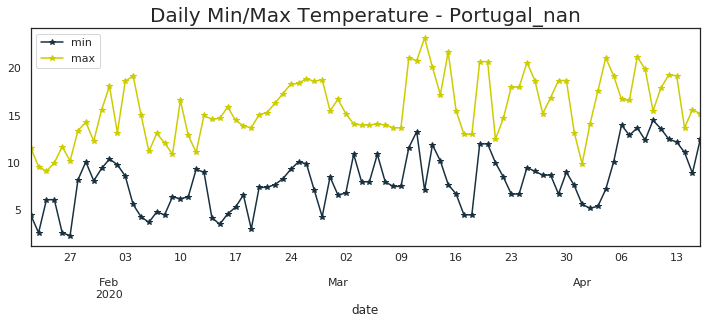

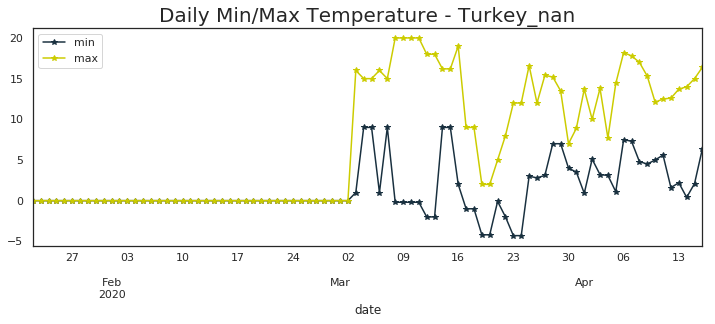

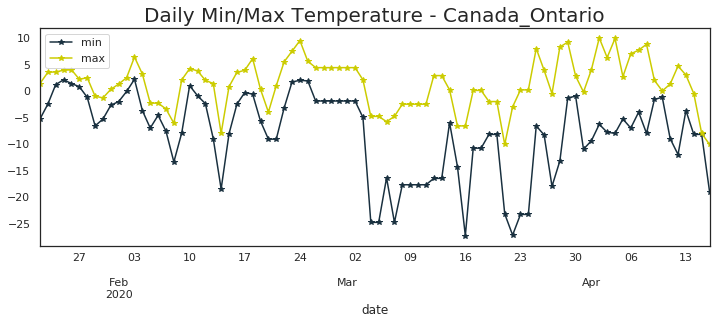

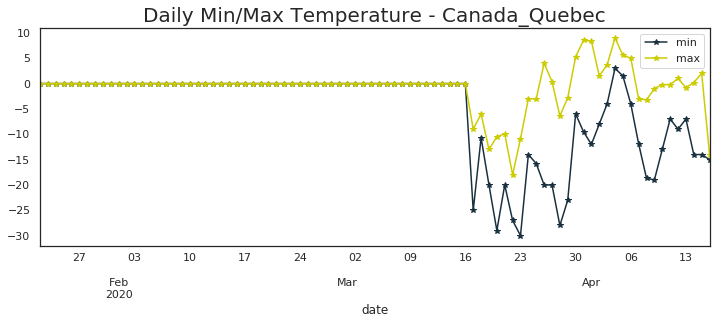

In [69]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [70]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           16.7  31.1
Spain_nan                   13.3  26.8
Italy_nan                   12.0  21.7
France_nan                  11.9  23.0
Germany_nan                  8.6  23.0
United Kingdom_nan          10.0  18.3
Iran_nan                    17.8  29.3
Turkey_nan                   9.0  20.0
China_Hubei                 18.6  27.0
Belgium_nan                 11.5  26.1
Brazil_nan                  23.0  36.0
Netherlands_nan             12.8  26.1
Switzerland_nan              9.9  19.0
Russia_nan                   1.3  20.0
Portugal_nan                14.5  23.2
Canada_Quebec                3.0   9.0
Austria_nan                  2.6  11.7
Ireland_nan                  0.0   0.0
Israel_nan                  12.9  24.7
India_nan                   25.0  40.5
Sweden_nan                   6.1  12.8
Peru_nan                     0.0   0.0
Korea, South_nan            

### Kalman X Days Ahead Prediction

In [71]:
%%R

#install.packages('reshape')

NULL


In [72]:
%%R
require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
### JOAO
#### for (i in 1:30) { # Set i days prediction
#####for (i in 1:45) { # Set i days prediction
for (i in 1:56) { # Set i days prediction    ### 56+4=60 days forward prediction with Kalman Filter
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [73]:
all_new=%R all_new

In [74]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

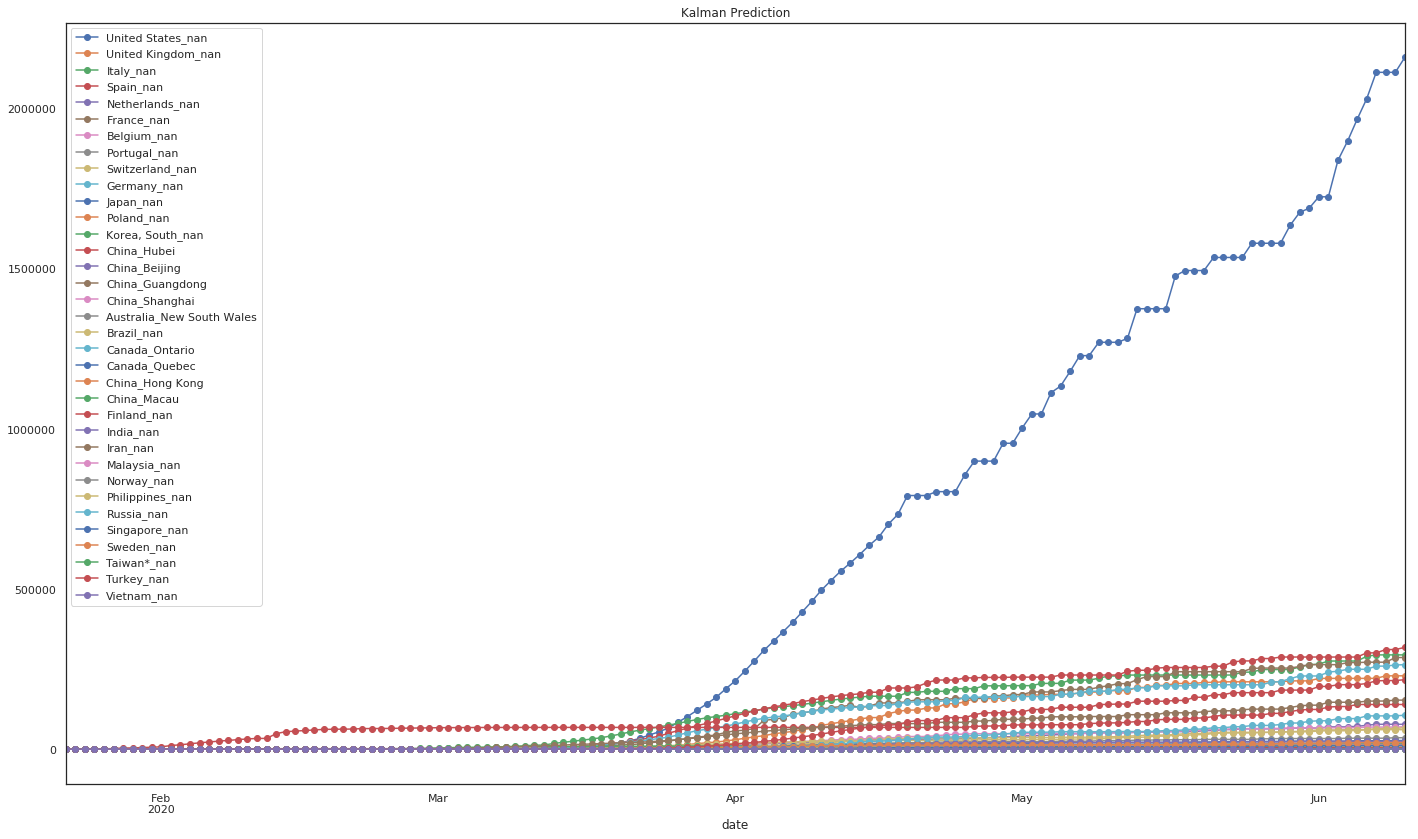

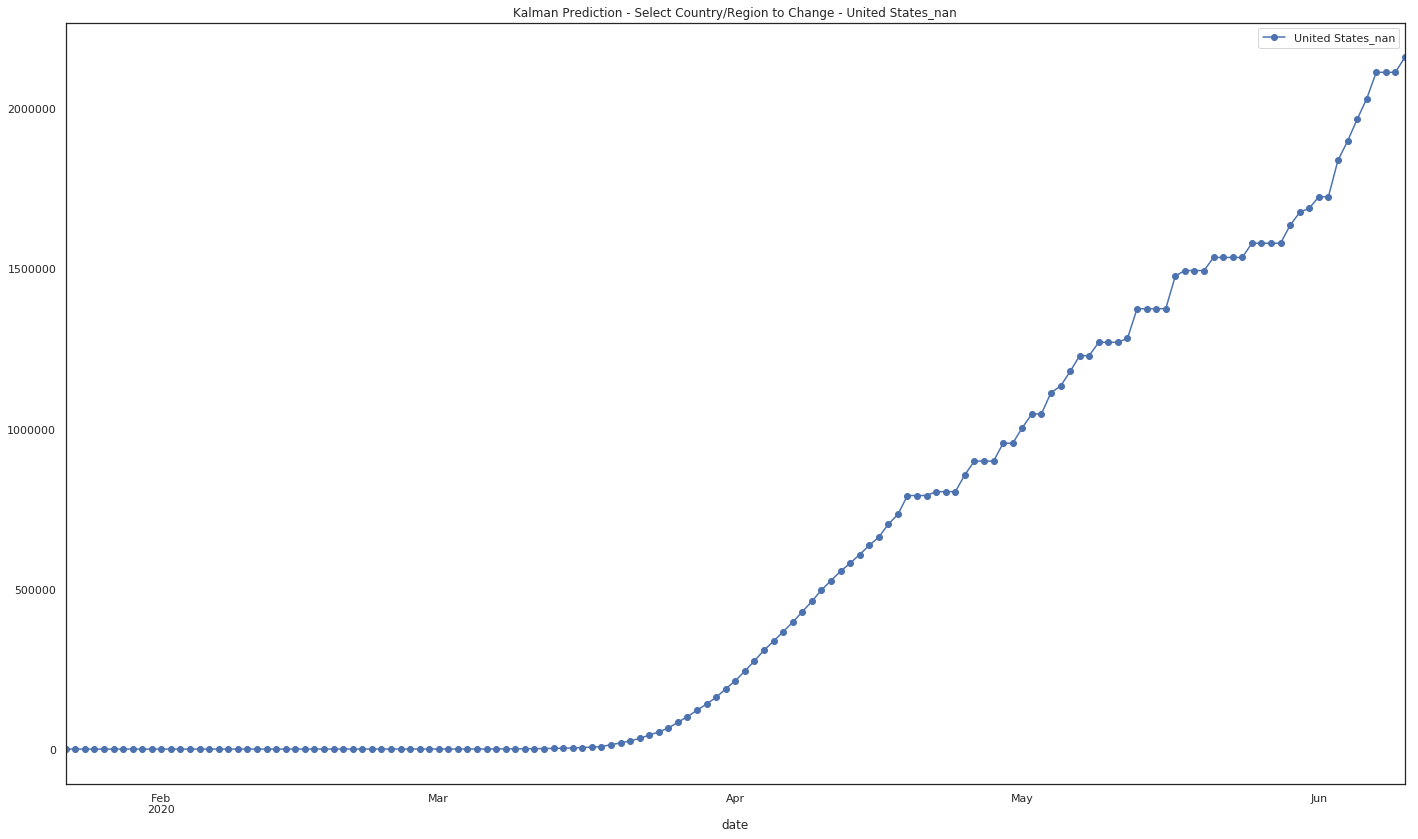

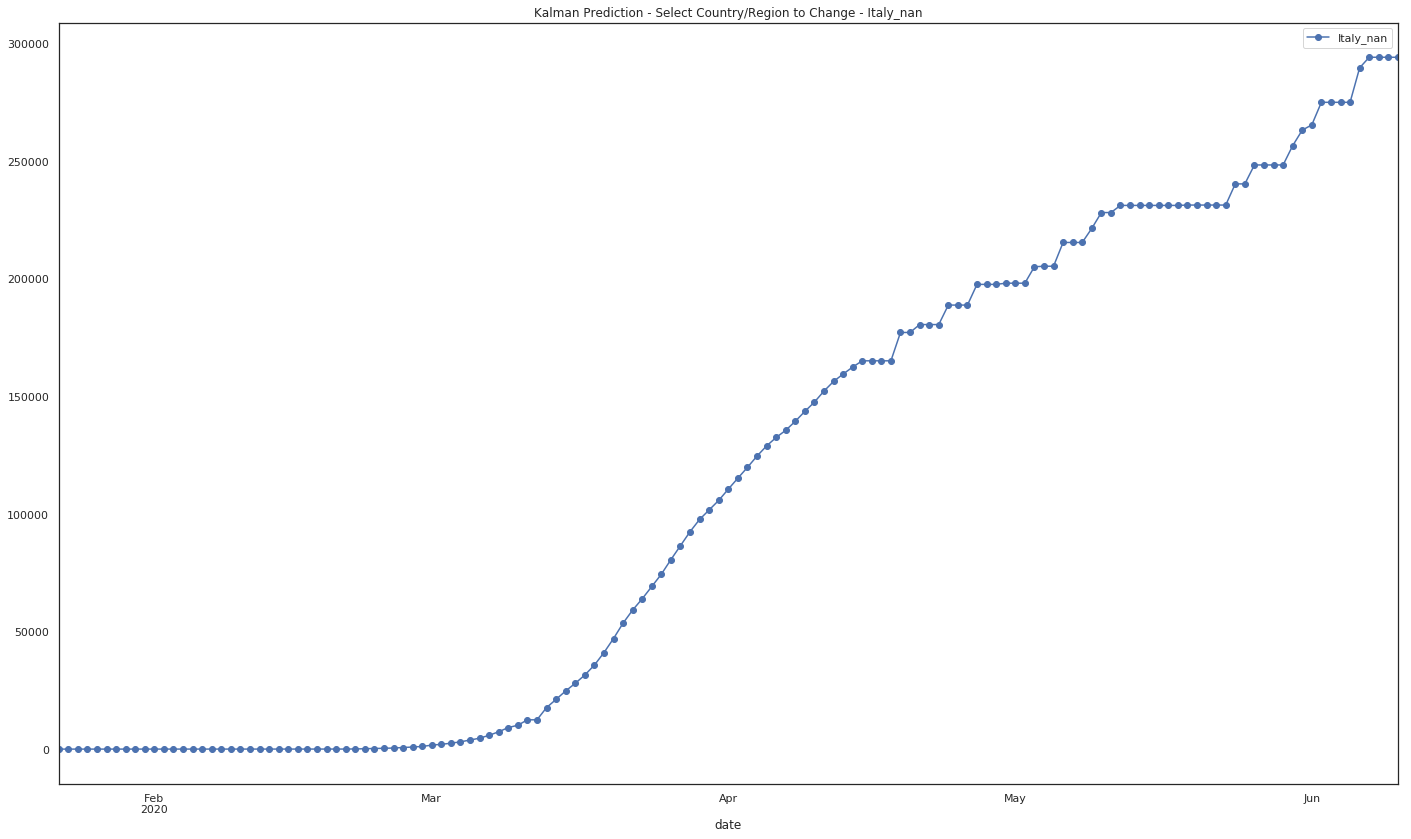

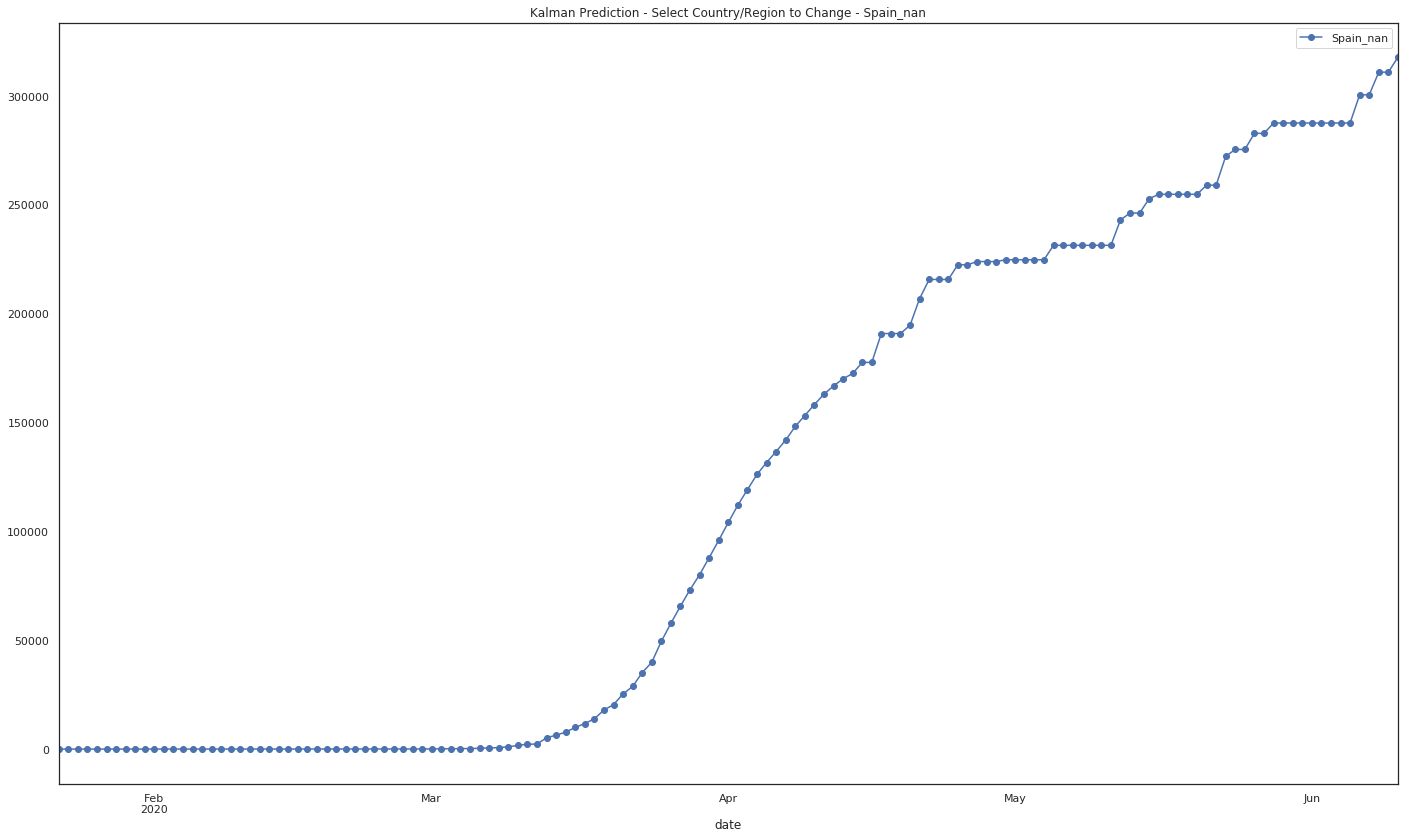

In [75]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


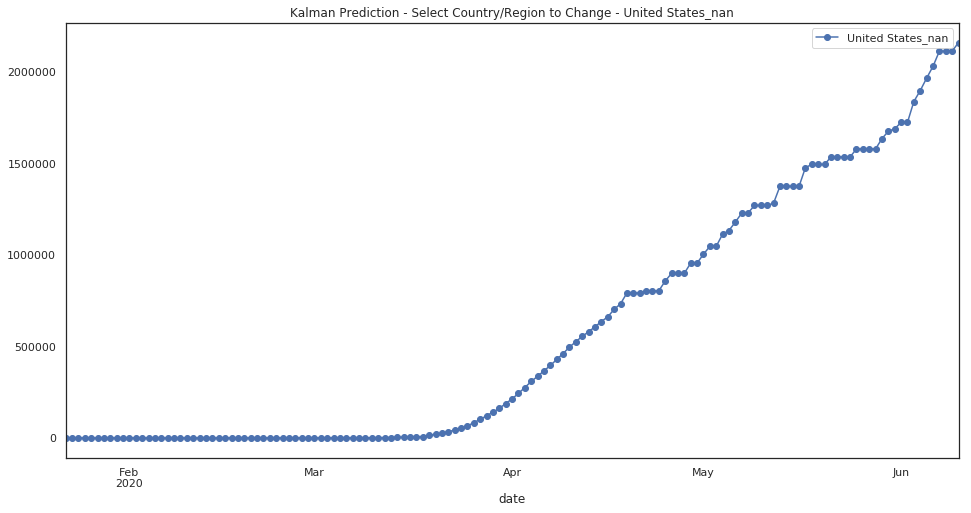

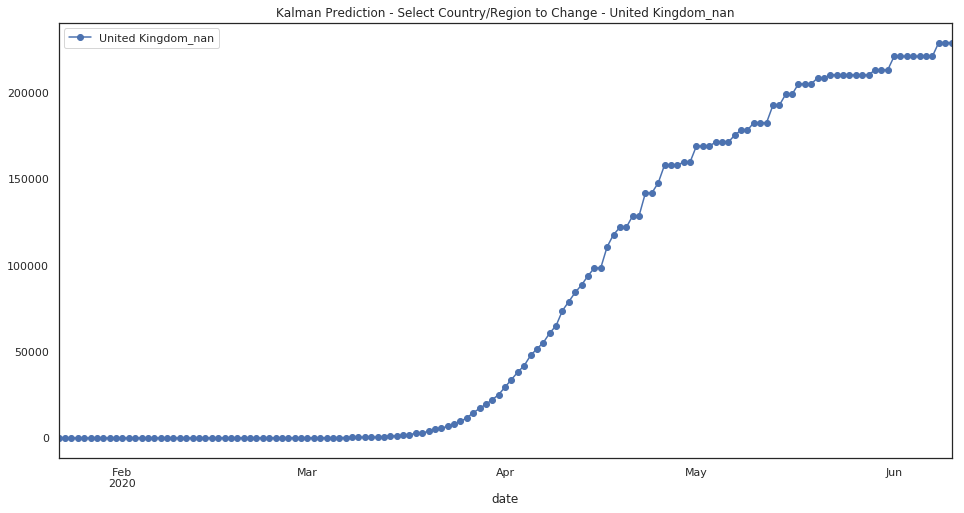

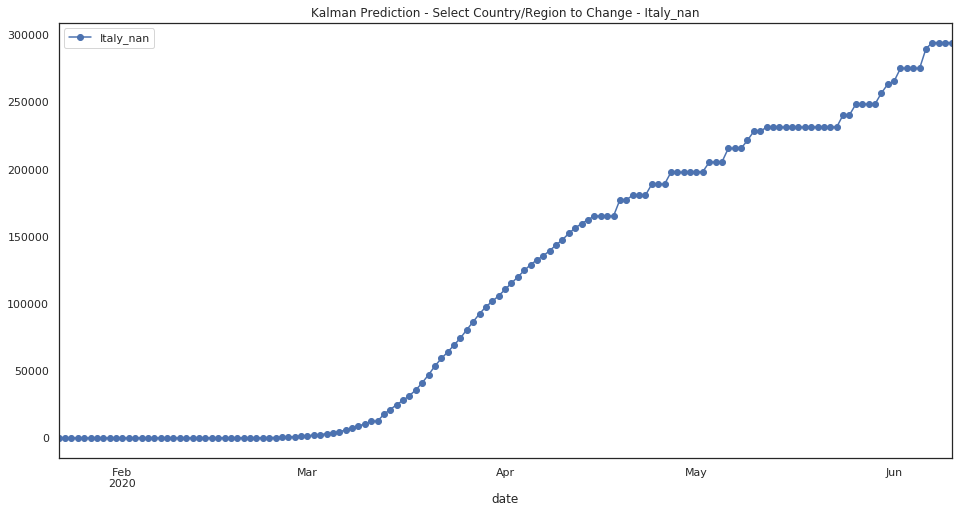

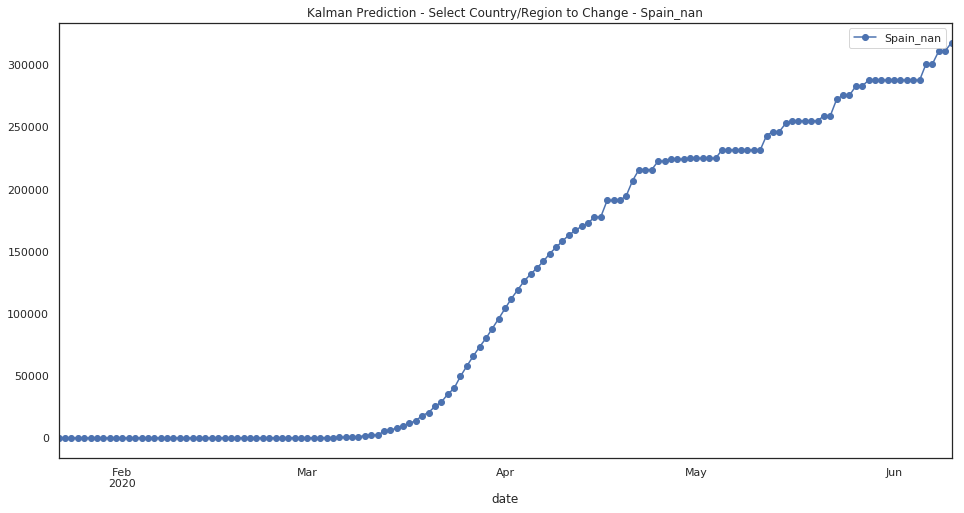

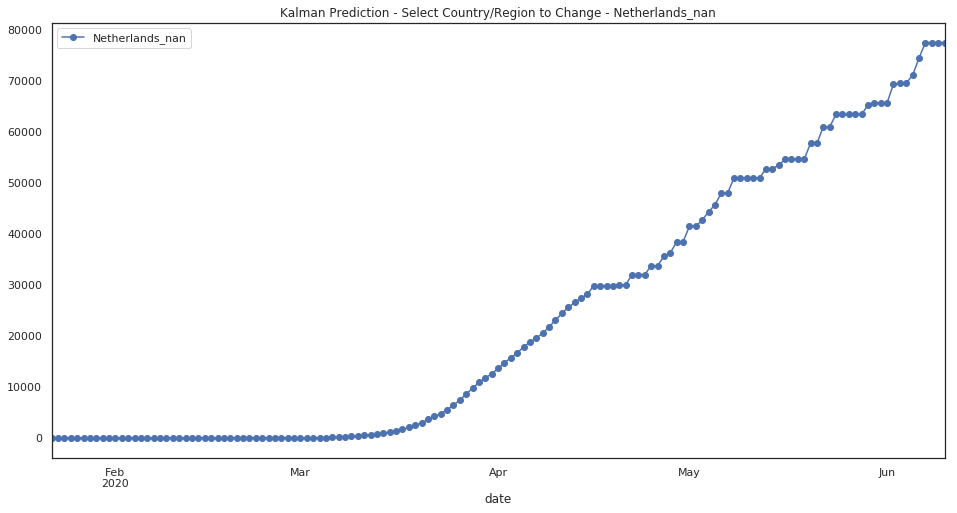

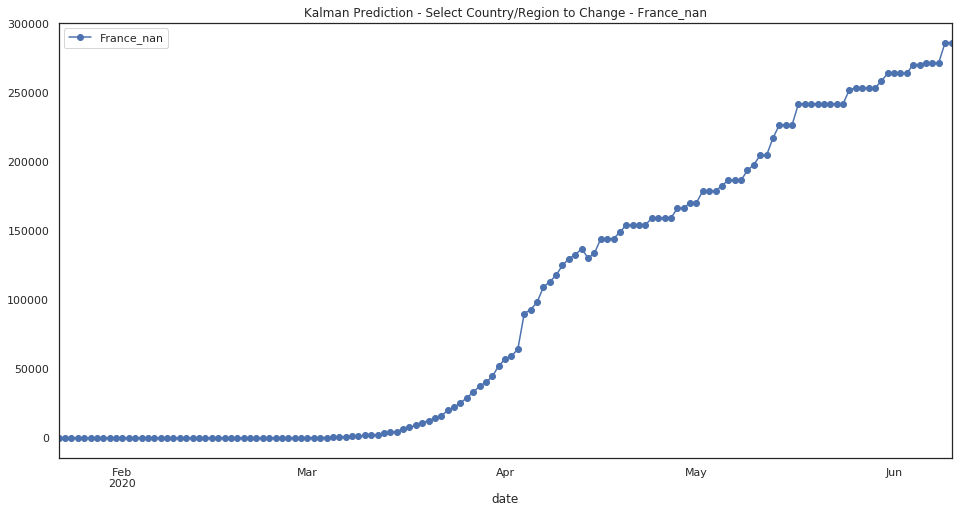

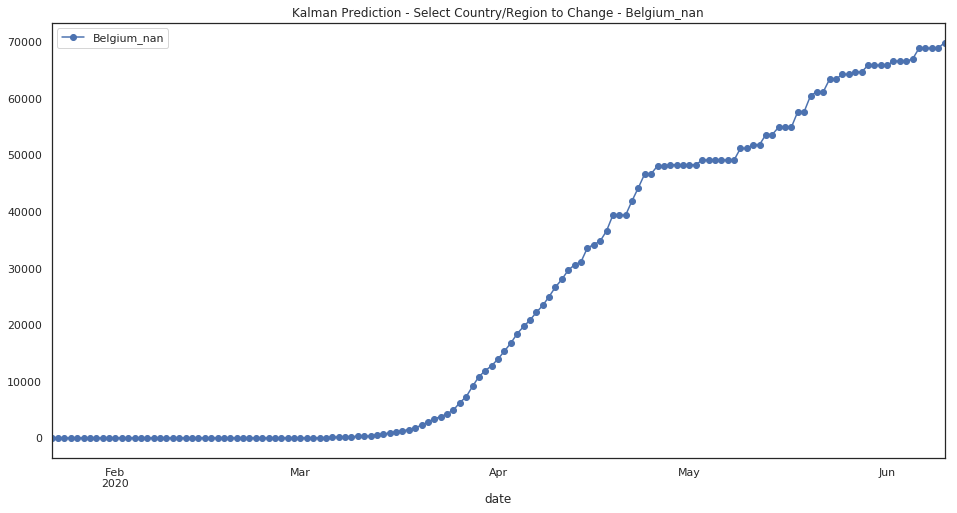

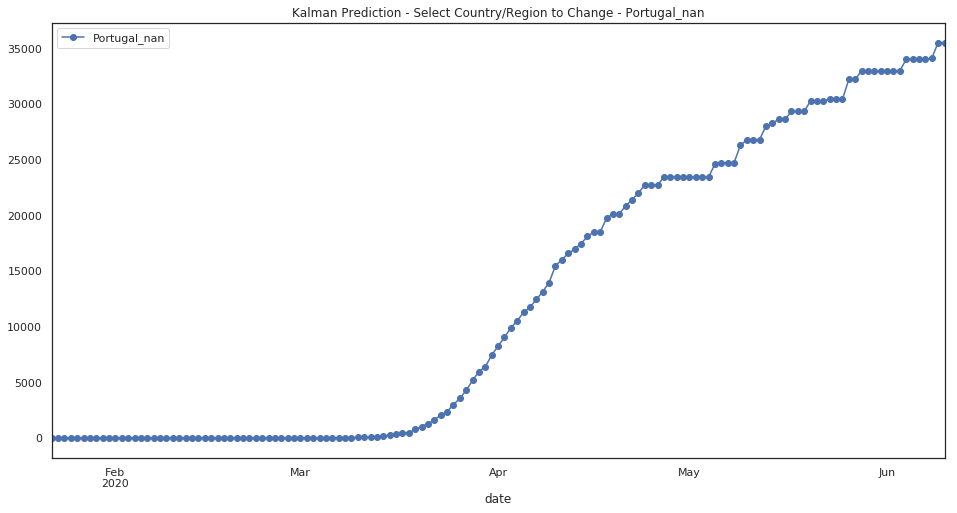

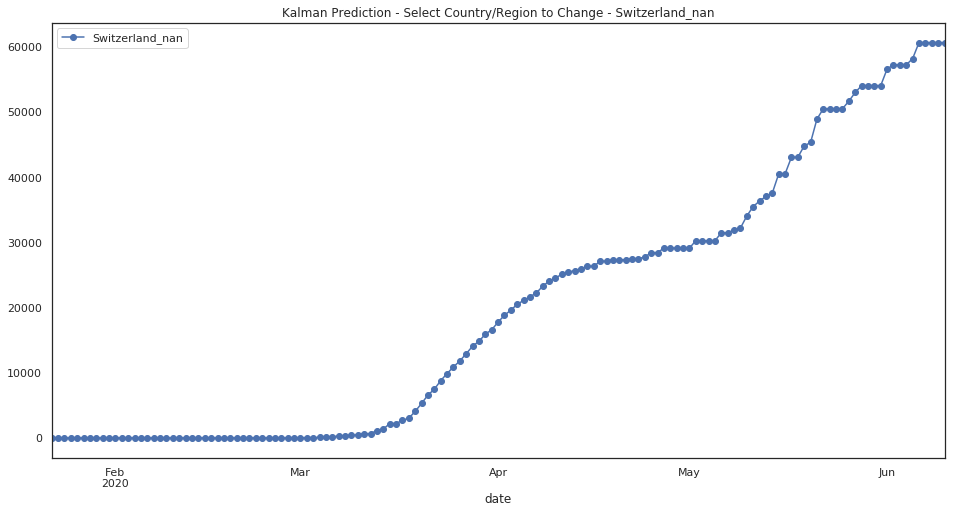

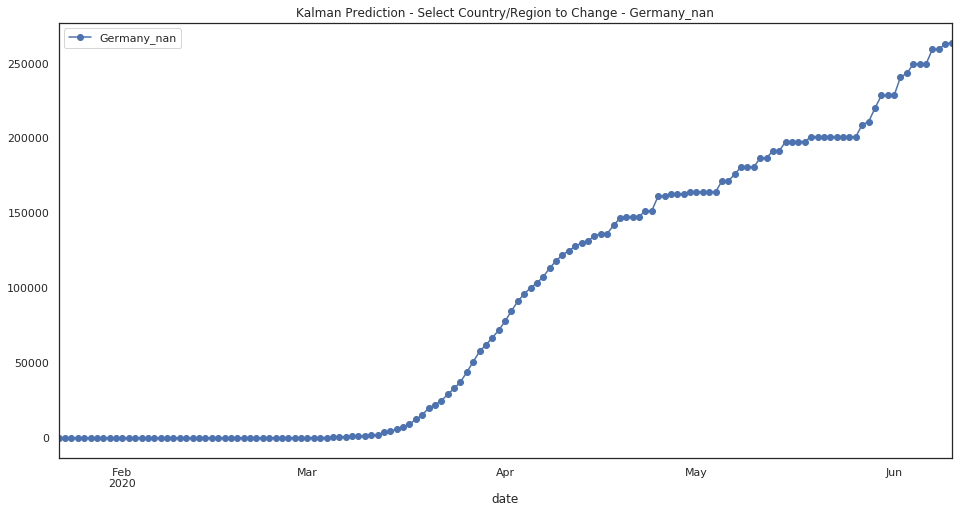

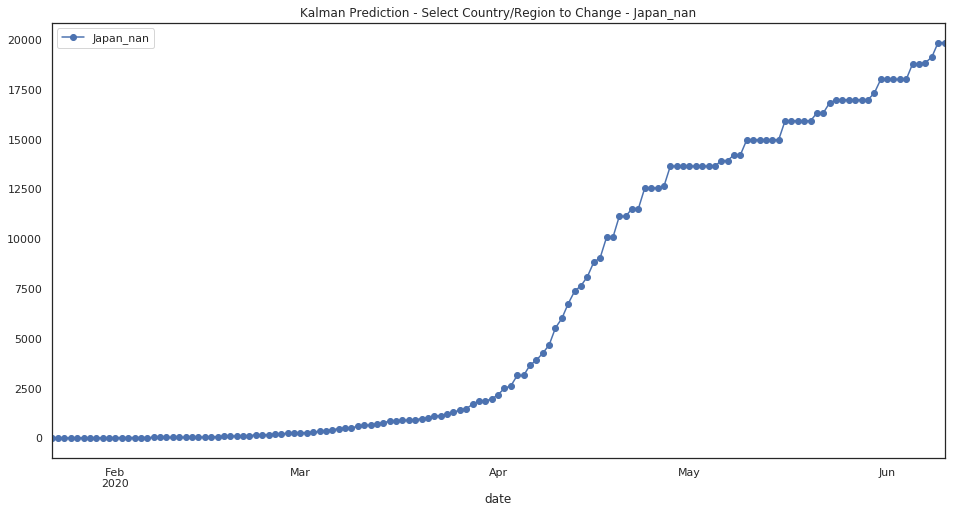

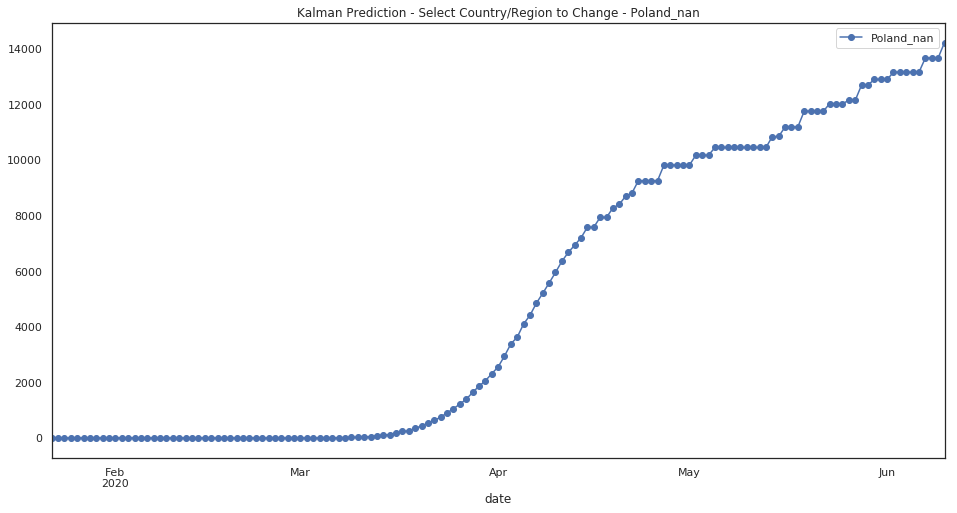

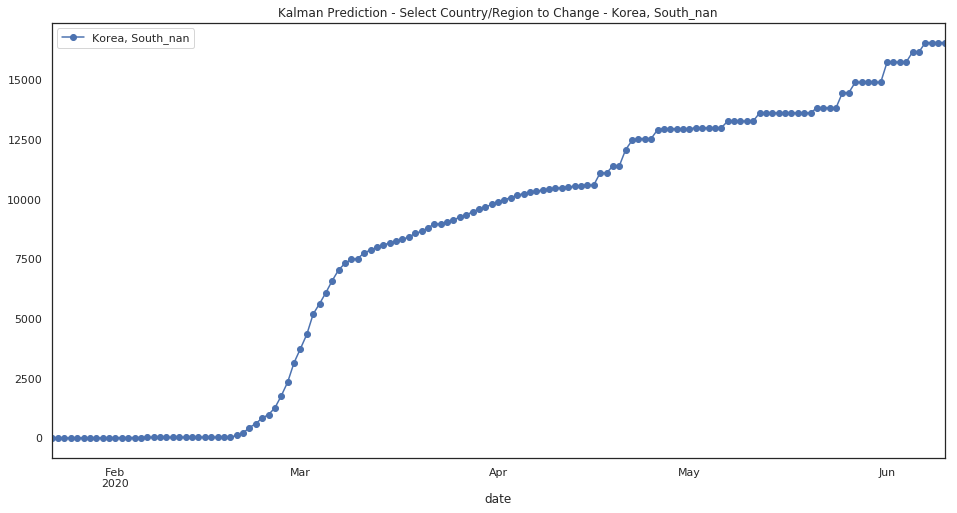

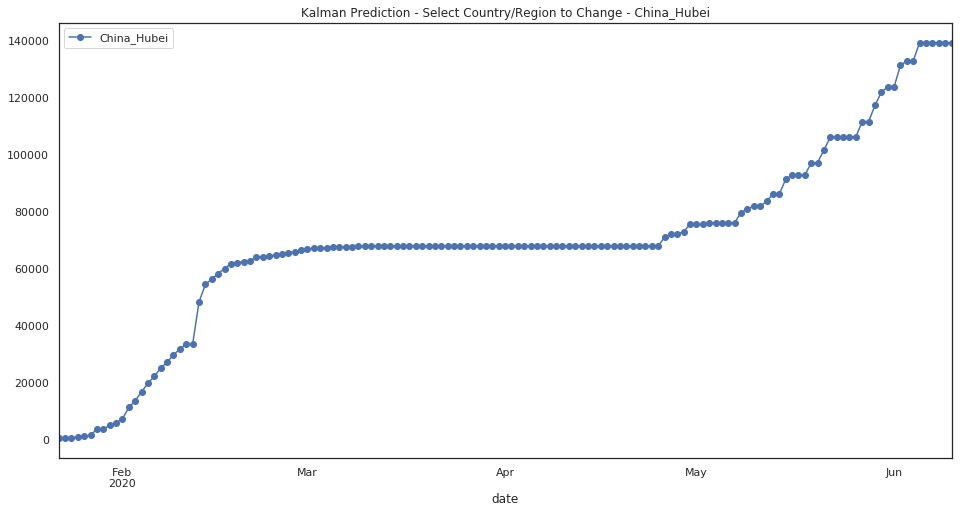

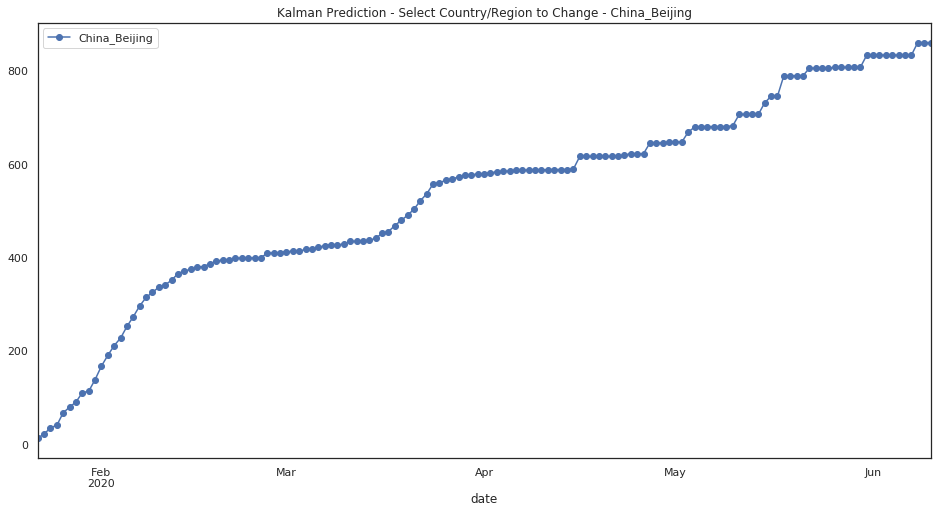

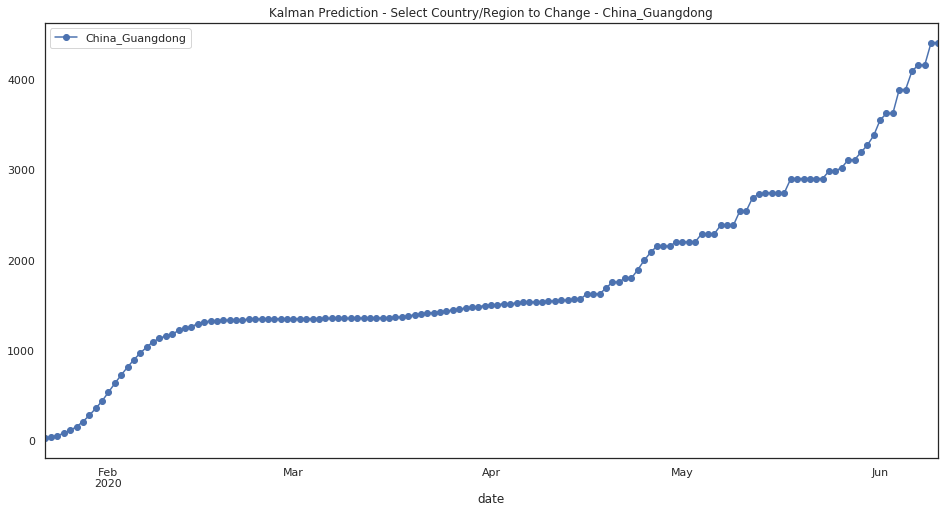

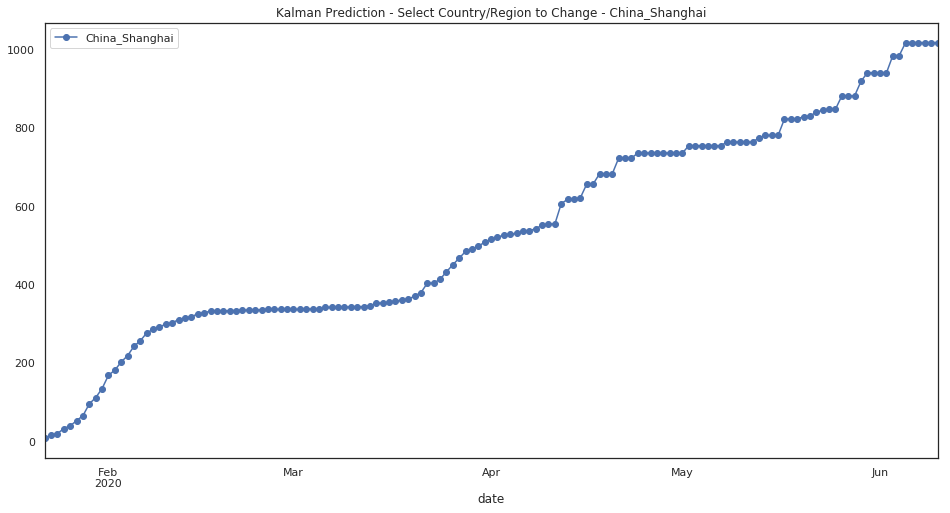

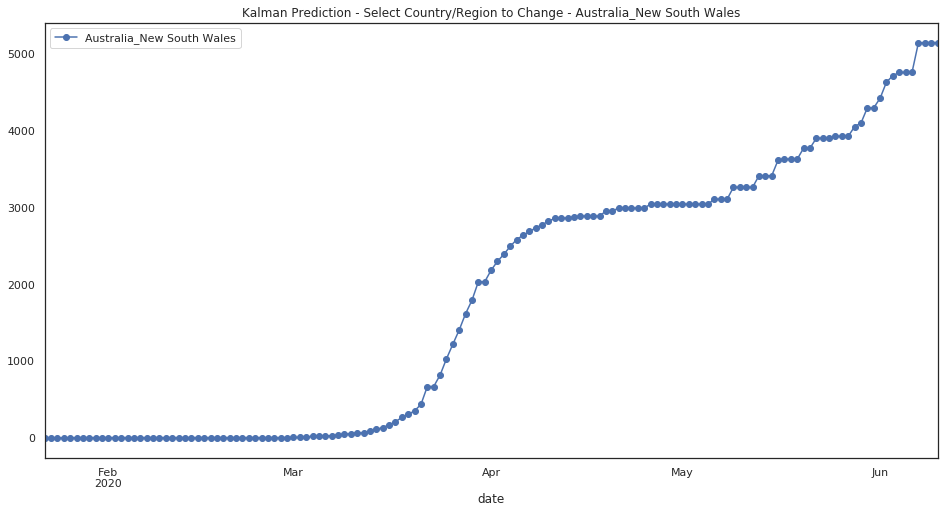

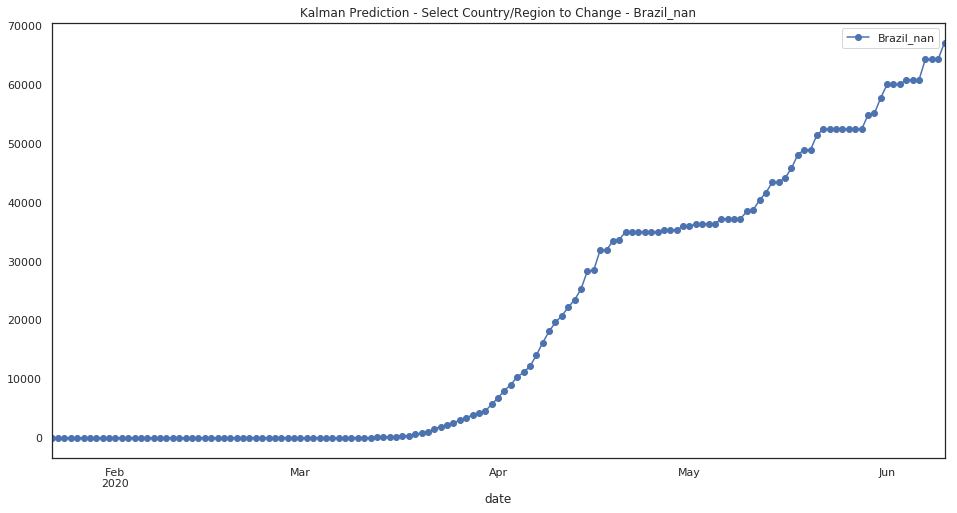

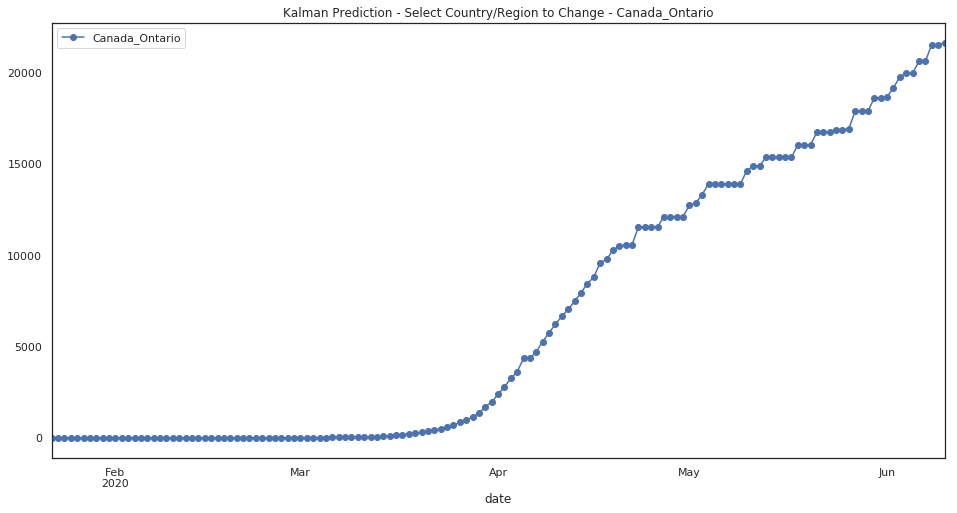

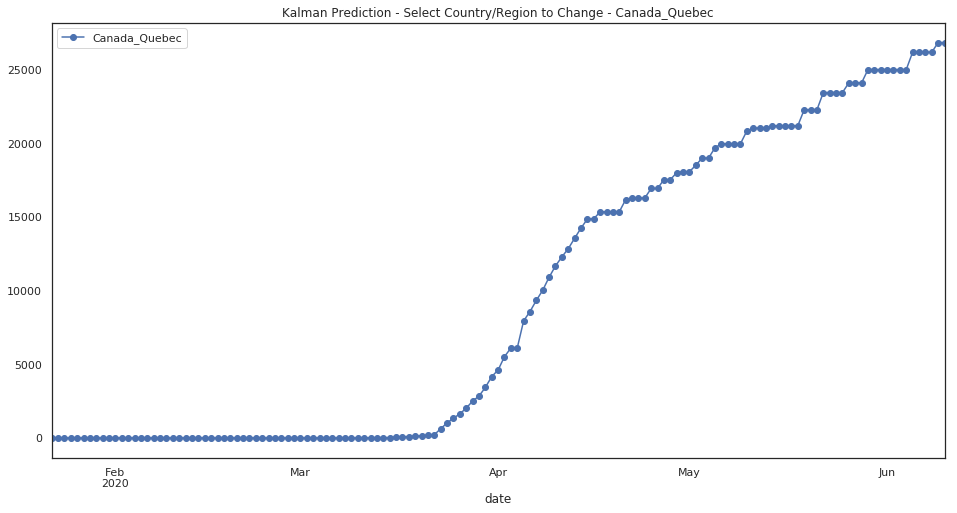

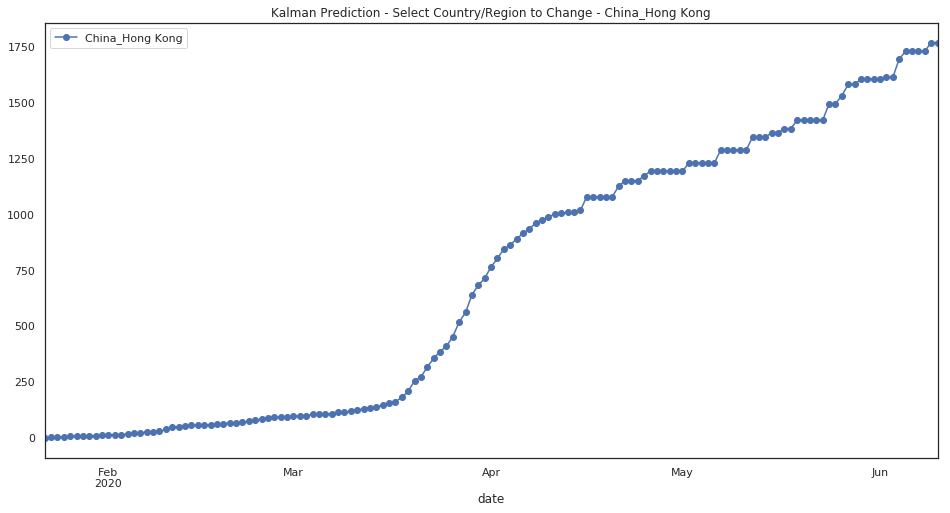

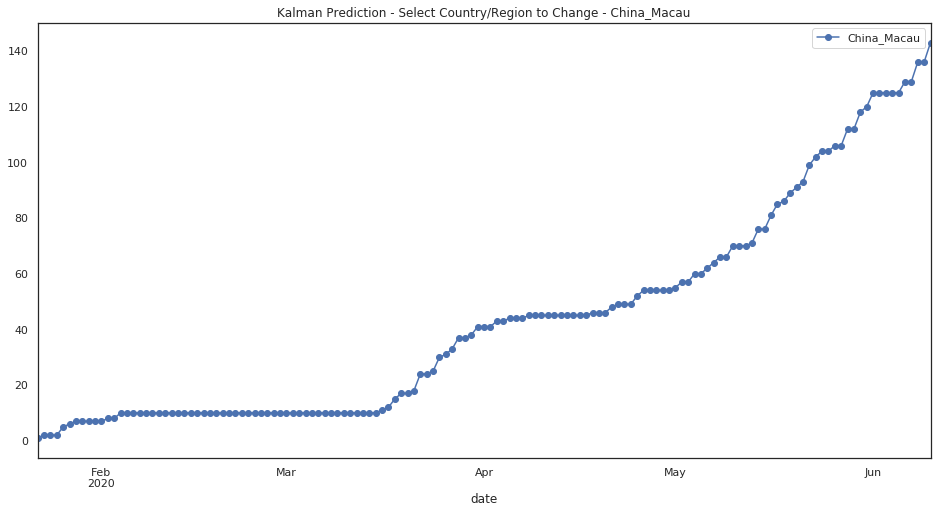

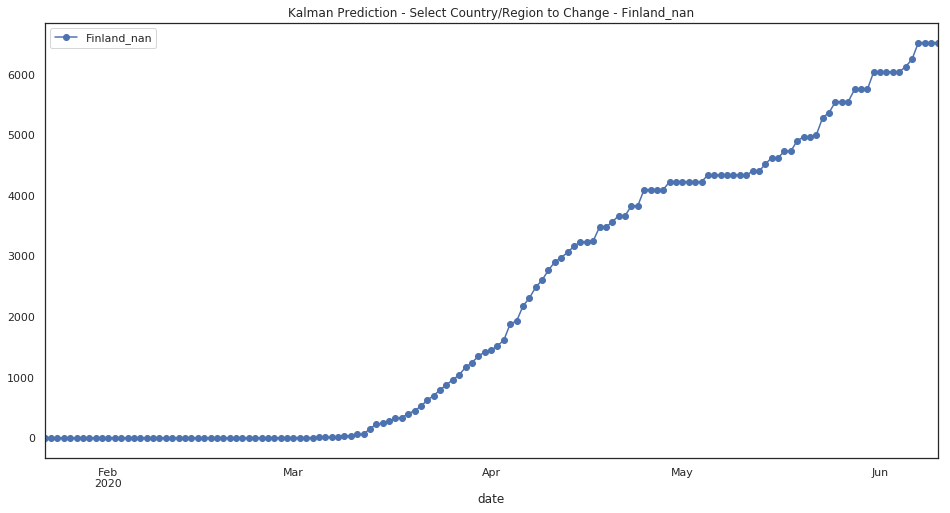

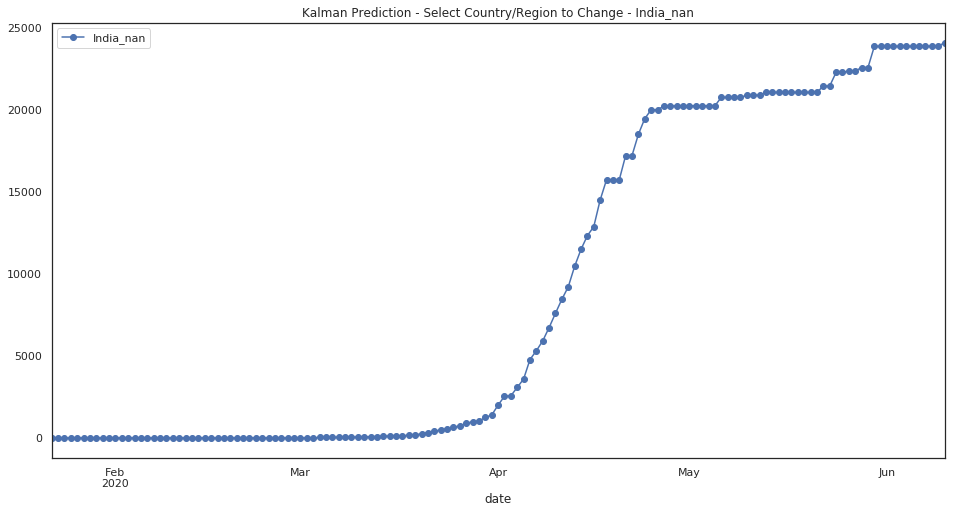

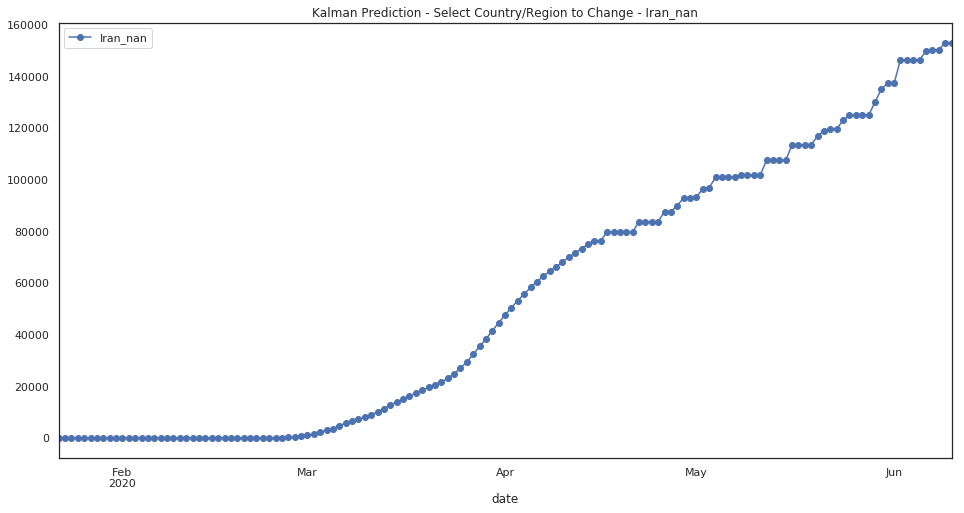

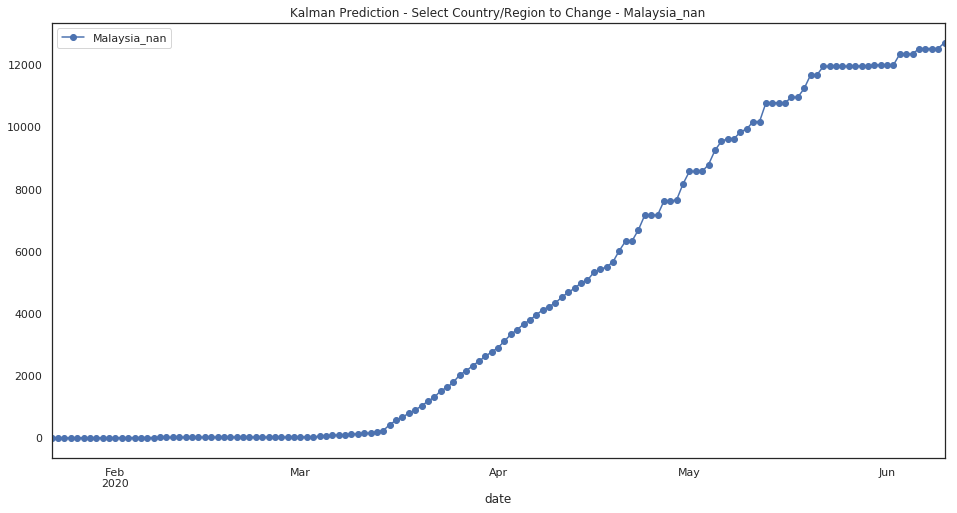

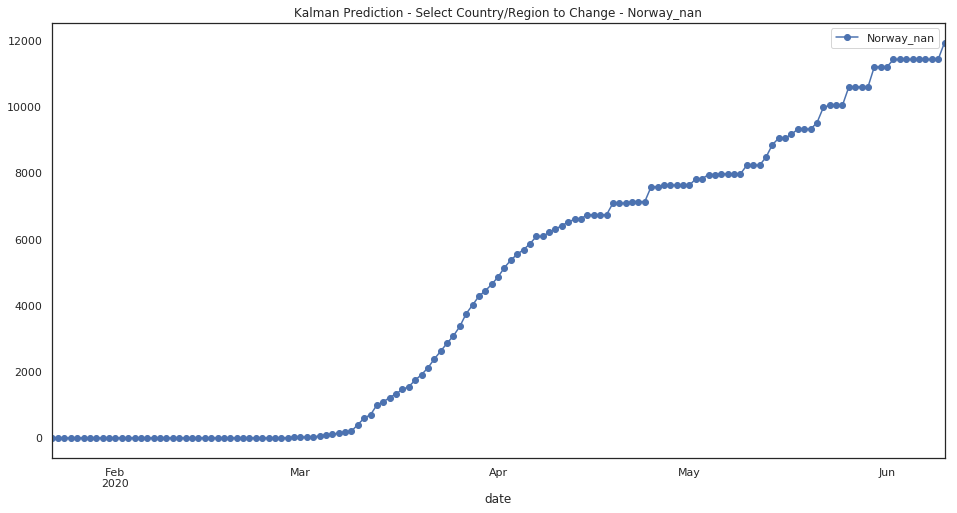

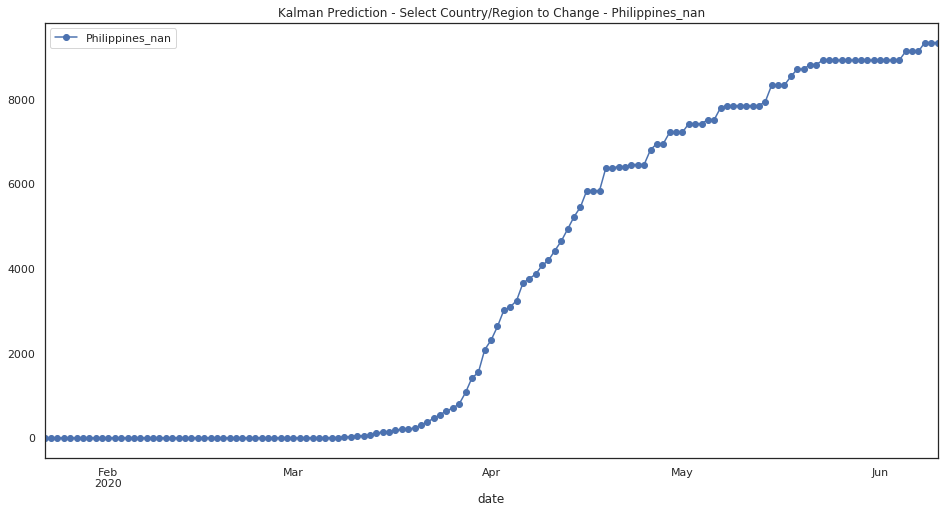

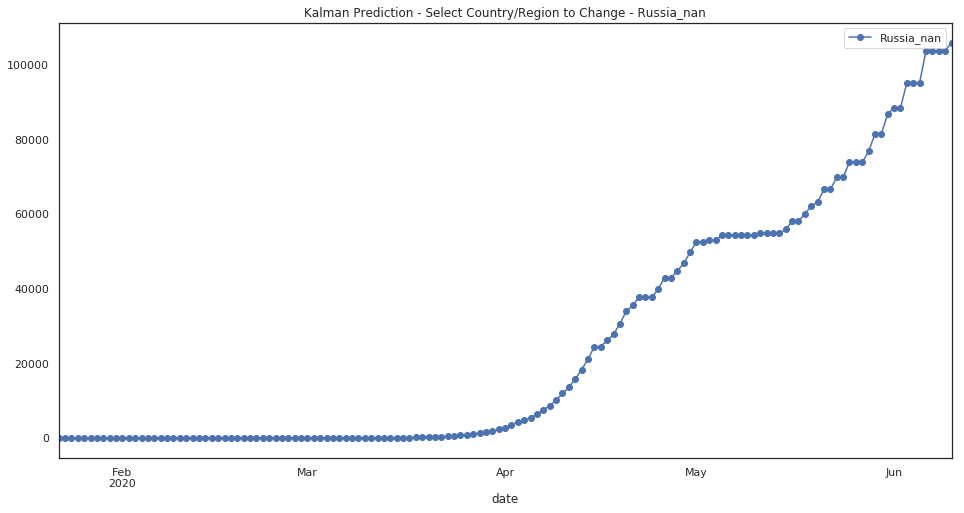

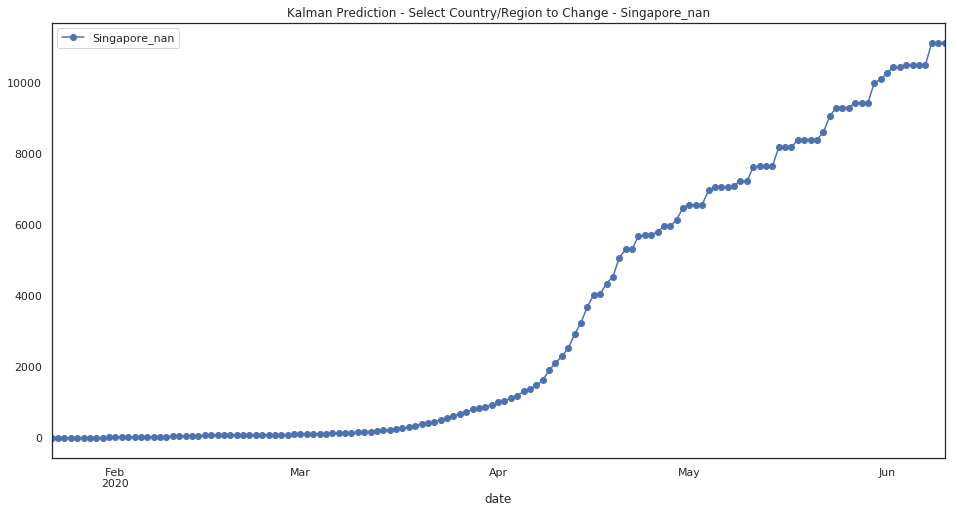

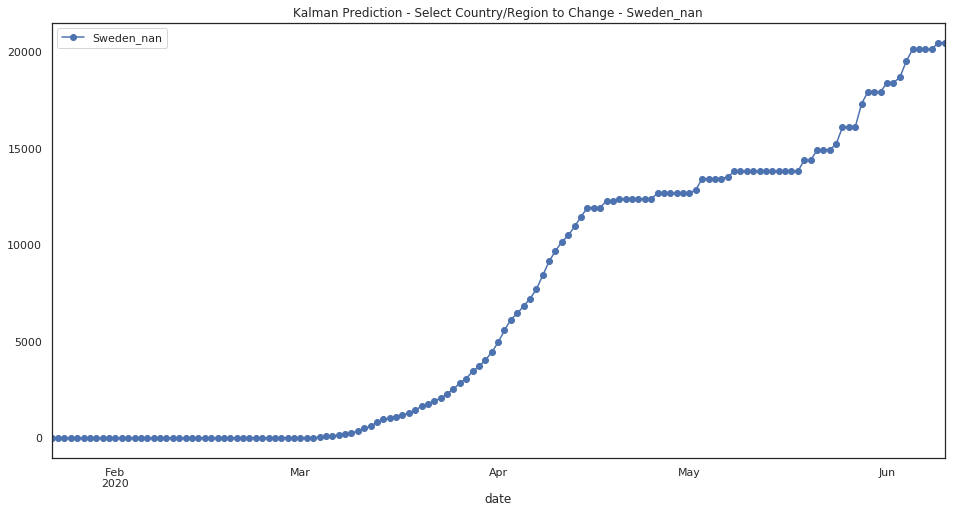

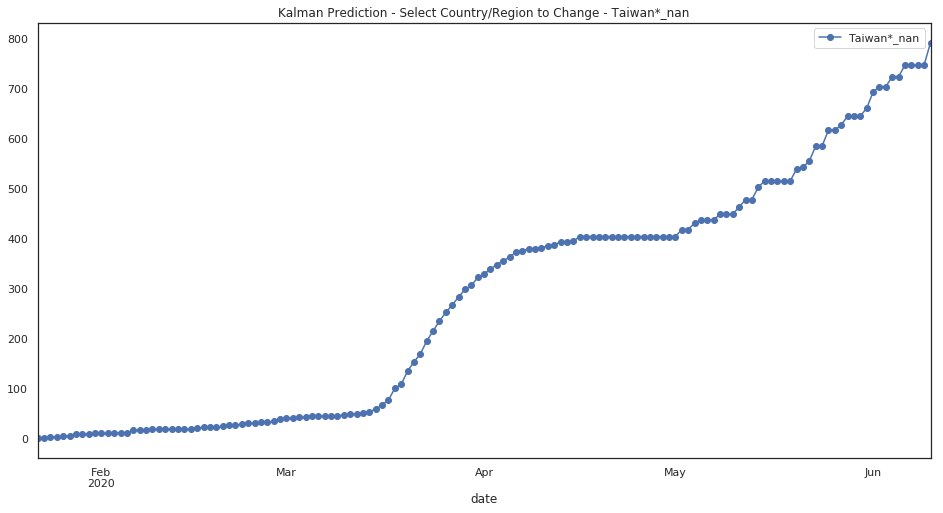

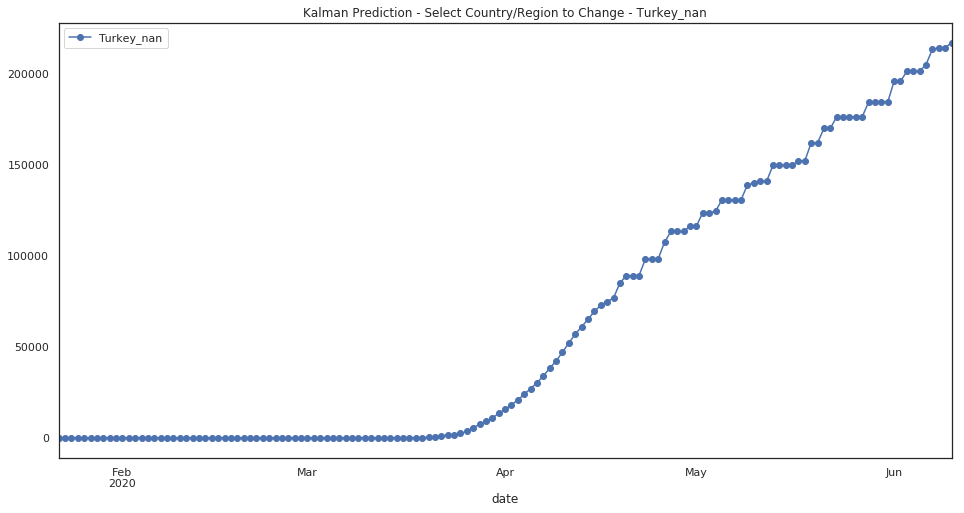

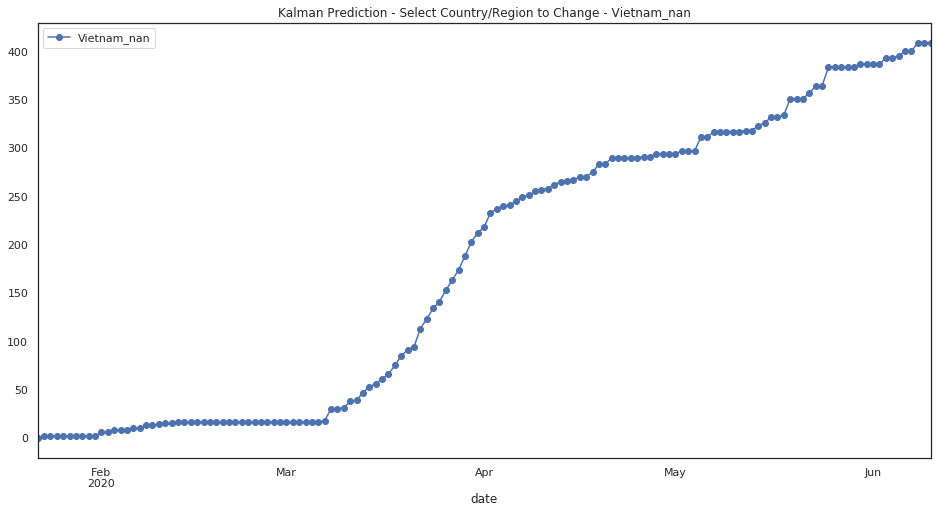

In [76]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [77]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-06-10 00:00:00
dtype: object


0  pred_confirmed
United States_nan                             2161107.0       2161107.0
Spain_nan                                      317813.0        317813.0
Italy_nan                                      294271.0        294271.0
France_nan                                     286035.0        286035.0
Germany_nan                                    263702.0        263702.0
United Kingdom_nan                             228930.0        228930.0
Turkey_nan                                     216977.0        216977.0
Iran_nan                                       153010.0        153010.0
China_Hubei                                    139397.0        139397.0
Russia_nan                                     105978.0        105978.0
Netherlands_nan                                 77494.0         77494.0
Belgium_nan                                     69848.0         69848.0
Brazil_nan                                      67102.0         67102.0
Switzerland_nan                                 60659.0         60659.0
Ireland_nan                                     38782.0         38782.0
Israel_nan                                      35583.0         35583.0
Portugal_nan                                    35503.0         35503.0
Peru_nan                                        32728.0         32728.0
Romania_nan                                     28843.0         28843.0
Canada_Quebec                                   26841.0         26841.0
India_nan                                       24086.0         24086.0
Czechia_nan                                     22712.0         22712.0
Qatar_nan                                       21922.0         21922.0
Canada_Ontario                                  21634.0         21634.0
Austria_nan                                     21588.0         21588.0
Sweden_nan                                      20468.0         20468.0
Japan_nan                                       19854.0         19854.0
United Arab Emirates_nan                        19660.0         19660.0
Chile_nan                                       16803.0         16803.0
Korea, South_nan                                16557.0         16557.0
...                                                 ...             ...
Botswana_nan                                       22.0            22.0
Grenada_nan                                        21.0            21.0
United Kingdom_Turks and Caicos Islands            20.0            20.0
United Kingdom_Montserrat                          20.0            20.0
Saint Vincent and the Grenadines_nan               19.0            19.0
Saint Kitts and Nevis_nan                          18.0            18.0
Dominica_nan                                       17.0            17.0
Denmark_Greenland                                  14.0            14.0
Seychelles_nan                                     12.0            12.0
Suriname_nan                                       10.0            10.0
MS Zaandam_nan                                      9.0             9.0
Canada_Yukon                                        9.0             9.0
Holy See_nan                                        8.0             8.0
Western Sahara_nan                                  8.0             8.0
Mauritania_nan                                      7.0             7.0
France_Saint Barthelemy                             6.0             6.0
Bhutan_nan                                          5.0             5.0
Canada_Northwest Territories                        5.0             5.0
Burundi_nan                                         5.0             5.0
South Sudan_nan                                     4.0             4.0
Sao Tome and Principe_nan                           4.0             4.0
United Kingdom_Anguilla                             3.0             3.0
United Kingdom_British Virgin Islands               3.0             3.0
Netherlands_Bonaire, Sint Eustatius and Saba        3.0             3.0
Papua New Guinea_nan  

In [78]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [79]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [80]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-2,2]-1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-4,2]-1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-8,2]-1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


In [81]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [82]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        

pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [83]:
pred[:-1]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-01-22           -240.0      -2928.0       -206.0    -109003.0   
2020-01-23              0.0          0.0          0.0          0.0   
2020-01-24              0.0          0.0          0.0          0.0   
2020-01-25              0.0          0.0          0.0          0.0   
2020-01-26              0.0          0.0          0.0          0.0   
2020-01-27              0.0          0.0          0.0          0.0   
2020-01-28              0.0          0.0          0.0          0.0   
2020-01-29              0.0          0.0          0.0          0.0   
2020-01-30              0.0          0.0          0.0          0.0   
2020-01-31              0.0          0.0          0.0          0.0   
2020-02-01              0.0          0.0          0.0          0.0   
2020-02-02              0.0          0.0          0.0          0.0   
2020-02-03              0.0          0.0          0.0          0.0   
2020-02-04              0.0          0.0          0.0          0.0   
2020-02-05              0.0          0.0          0.0          0.0   
2020-02-06              0.0          0.0          0.0          0.0   
2020-02-07              0.0          0.0          0.0          0.0   
2020-02-08              0.0          0.0          0.0          0.0   
2020-02-09              0.0          0.0          0.0          0.0   
2020-02-10              0.0          0.0          0.0          0.0   
2020-02-11              0.0          0.0          0.0          0.0   
2020-02-12              0.0          0.0          0.0          0.0   
2020-02-13              0.0          0.0          0.0          0.0   
2020-02-14              0.0          0.0          0.0          0.0   
2020-02-15              0.0          0.0          0.0          0.0   
2020-02-16              0.0          0.0          0.0          0.0   
2020-02-17              0.0          0.0          0.0          0.0   
2020-02-18              0.0          0.0          0.0          0.0   
2020-02-19              0.0          0.0          0.0          0.0   
2020-02-20              0.0          0.0          0.0          0.0   
...                     ...          ...          ...          ...   
2020-05-12           1293.0        829.0       4567.0       1017.0   
2020-05-13           1293.0        829.0       4626.0       1017.0   
2020-05-14           1378.0        838.0       4631.0       1068.0   
2020-05-15           1378.0        838.0       4631.0       1068.0   
2020-05-16           1378.0        838.0       4998.0       1068.0   
2020-05-17           1461.0        838.0       4998.0       1126.0   
2020-05-18           1492.0        868.0       4998.0       1153.0   
2020-05-19           1538.0        900.0       4998.0       1153.0   
2020-05-20           1538.0        922.0       5134.0       1240.0   
2020-05-21           1538.0        922.0       5134.0       1245.0   
2020-05-22           1558.0        927.0       5153.0       1245.0   
2020-05-23           1609.0        949.0       5153.0       1245.0   
2020-05-24           1609.0        949.0       5433.0       1332.0   
2020-05-25           1609.0        960.0       5433.0       1372.0   
2020-05-26           1609.0       1022.0       5678.0       1372.0   
2020-05-27           1609.0       1022.0       5902.0       1372.0   
2020-05-28           1674.0       1022.0       5902.0       1408.0   
2020-05-29           1674.0       1022.0       5902.0       1408.0   
2020-05-30           1674.0       1022.0       6280.0       1423.0   
2020-05-31           1674.0       1058.0       6280.0       1443.0   
2020-06-01           1674.0       1058.0       6375.0       1443.0   
2020-06-02           1737.0       1123.0       6375.0       1443.0   
2020-06-03           1737.0       1123.0       6531.0       1486.0   
2020-06-04           1737.0       1123.0       6531.0       1486.0   
2020-06-05

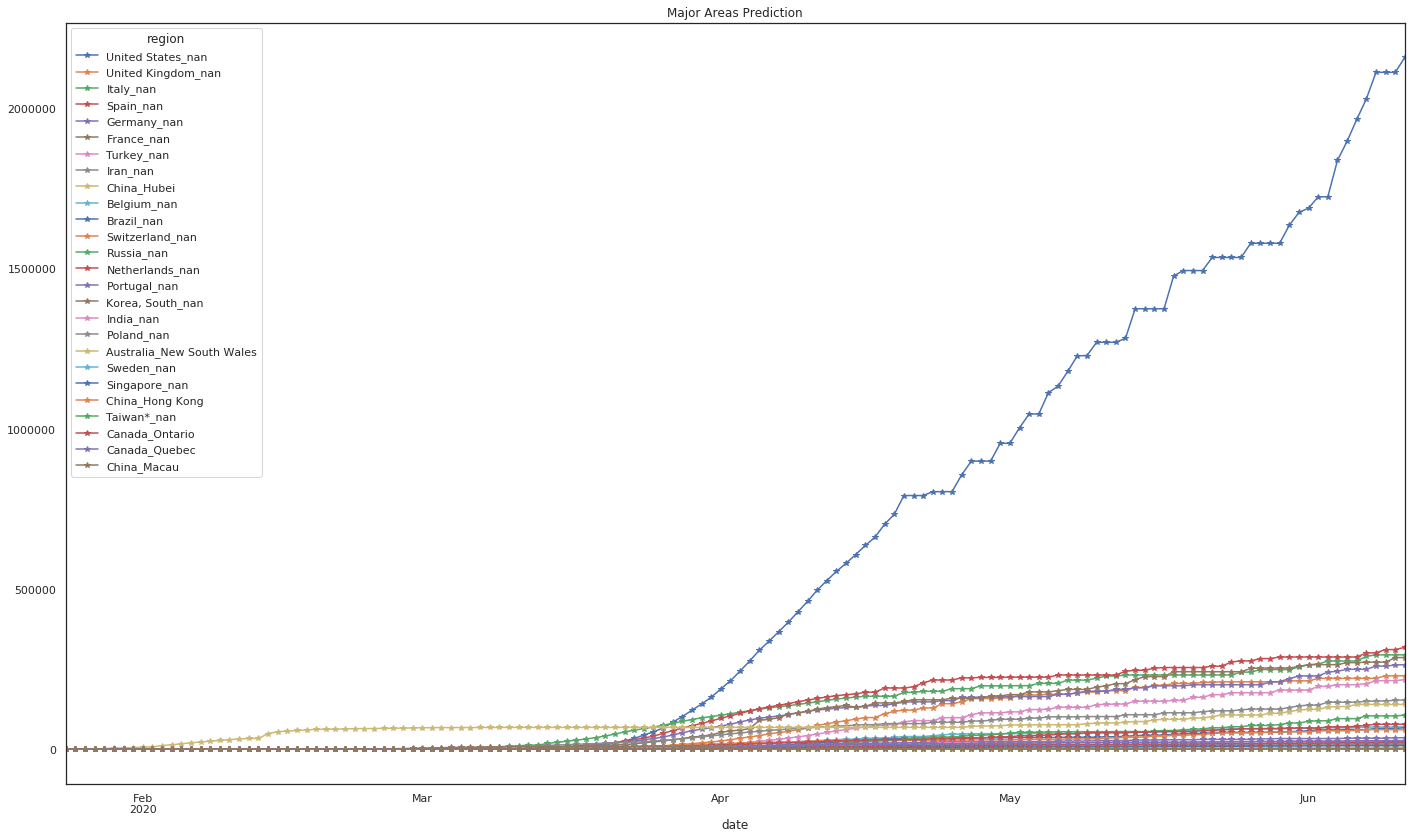

In [84]:
region=[
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',
        'Germany_nan',
        'France_nan',
        'Turkey_nan',
        'Iran_nan',
        'China_Hubei',
        'Belgium_nan',
        'Brazil_nan',
        'Switzerland_nan',
        'Russia_nan',
        'Netherlands_nan',
        'Portugal_nan',
        'Korea, South_nan',
        'India_nan',
        'Poland_nan',
        'Australia_New South Wales',
        'Sweden_nan',
        'Singapore_nan',
        'China_Hong Kong',
        'Taiwan*_nan',
        'Canada_Ontario',
        'Canada_Quebec',
        'China_Macau'
  ### JOAO - LIST of Countries - Finish here     
       ]

p=pred[region]
p[2:].plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

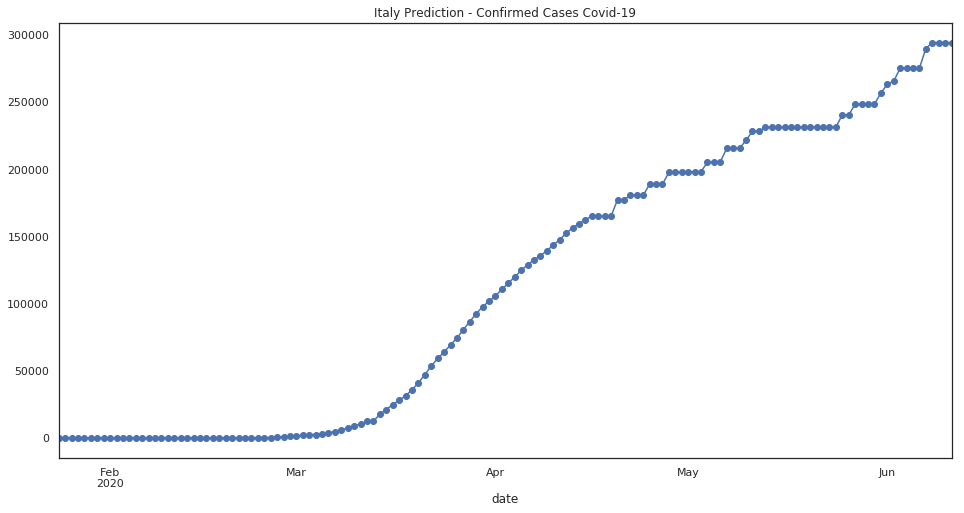

In [85]:
### Joao - Error - KeyError: 'Italy_nan'
p2=pred['Italy_nan']
p2[2:].plot(marker='o',figsize=(16,8),title ='Italy Prediction - Confirmed Cases Covid-19')

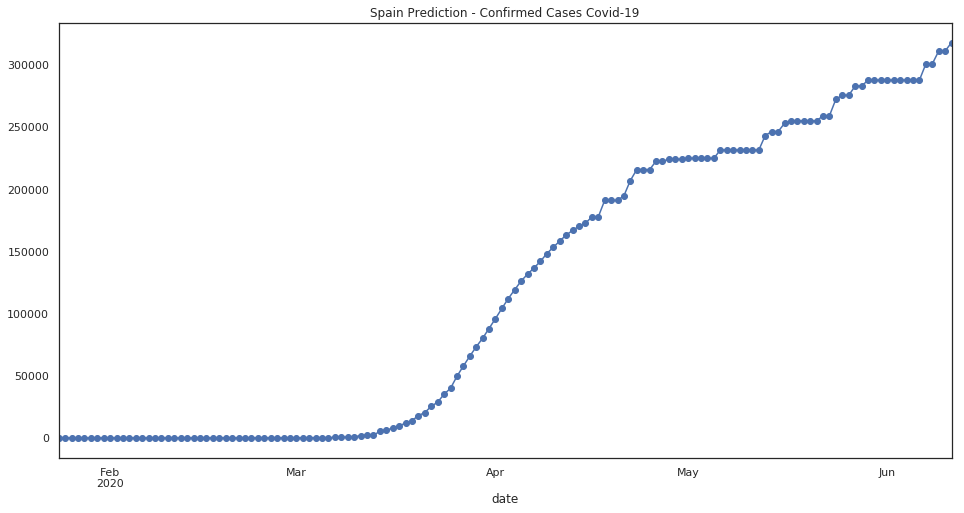

In [86]:
p3=pred['Spain_nan']
p3[2:].plot(marker='o',figsize=(16,8),title ='Spain Prediction - Confirmed Cases Covid-19')

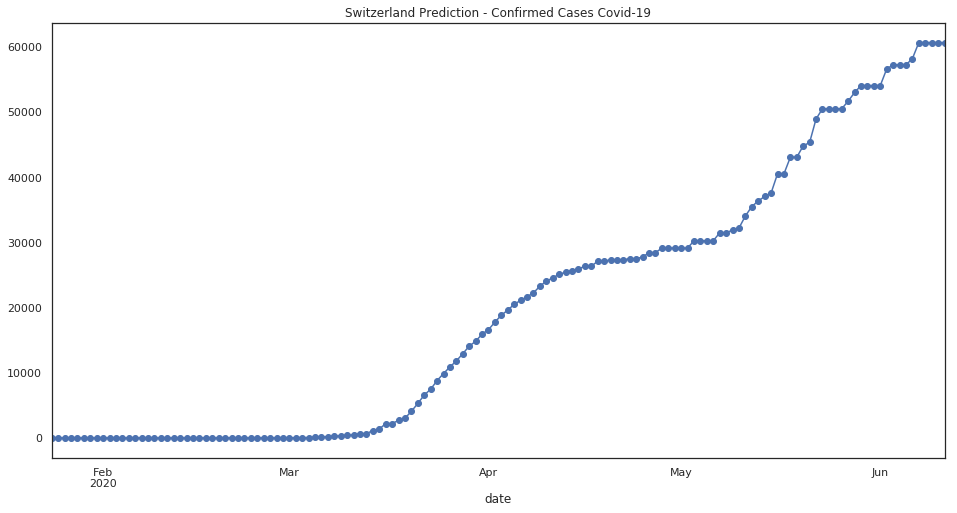

In [87]:
p4=pred['Switzerland_nan']
p4[2:].plot(marker='o',figsize=(16,8),title ='Switzerland Prediction - Confirmed Cases Covid-19')

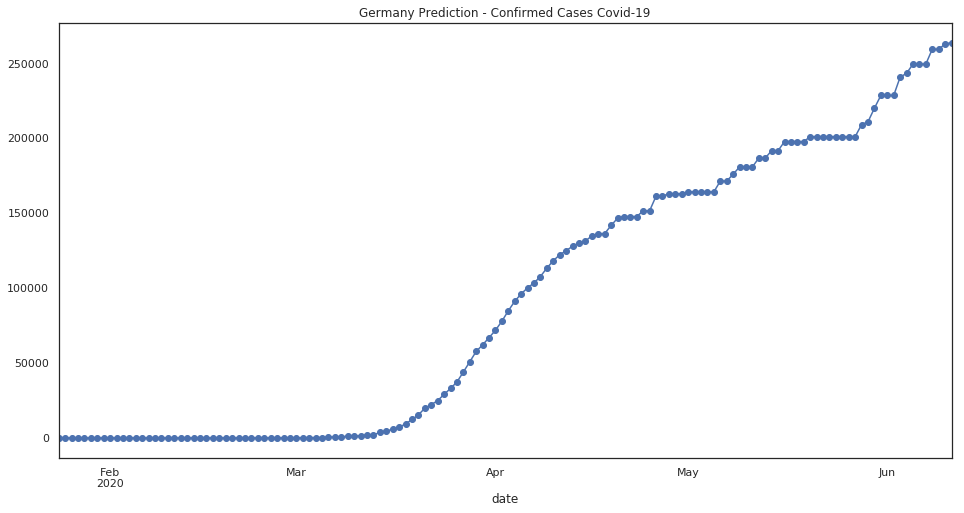

In [88]:
p5=pred['Germany_nan']
p5[2:].plot(marker='o',figsize=(16,8),title ='Germany Prediction - Confirmed Cases Covid-19')

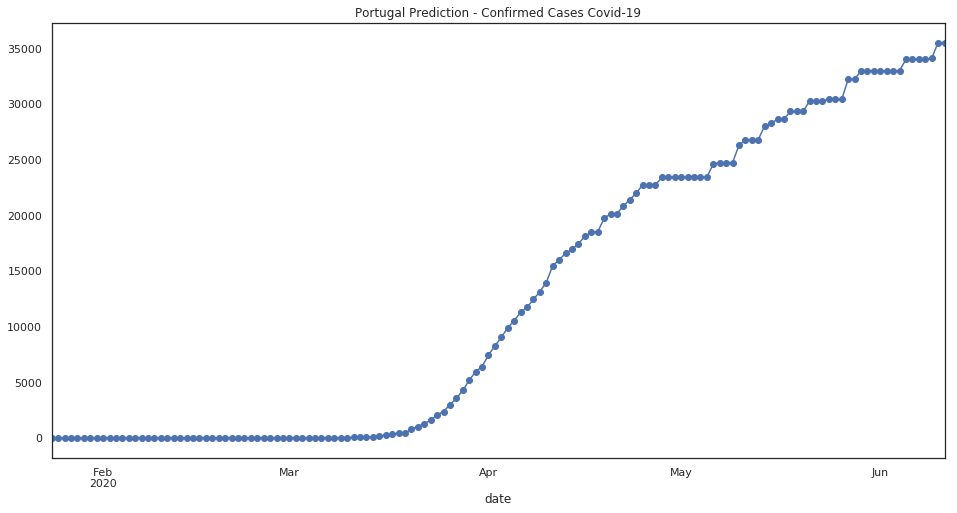

In [89]:
p6=pred['Portugal_nan']
p6[2:].plot(marker='o',figsize=(16,8),title ='Portugal Prediction - Confirmed Cases Covid-19')

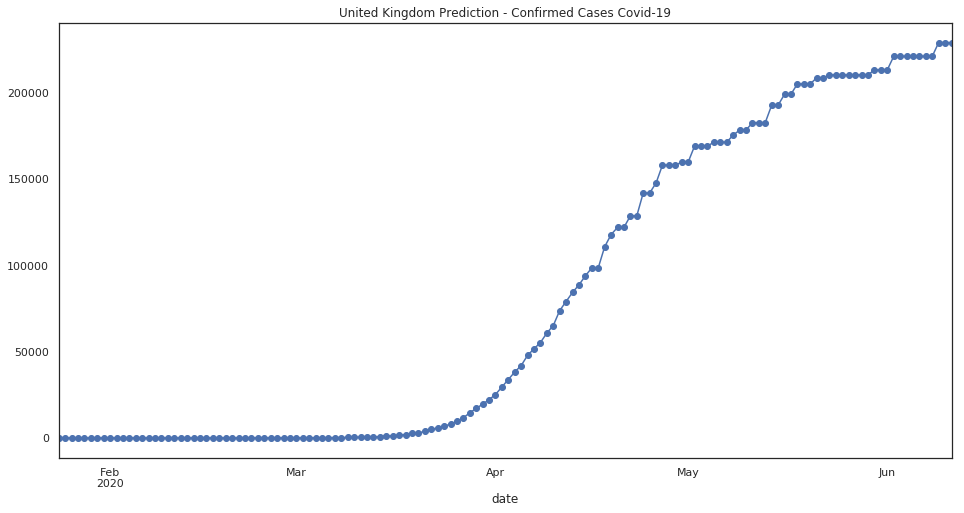

In [90]:
p8=pred['United Kingdom_nan']
p8[2:].plot(marker='o',figsize=(16,8),title ='United Kingdom Prediction - Confirmed Cases Covid-19')

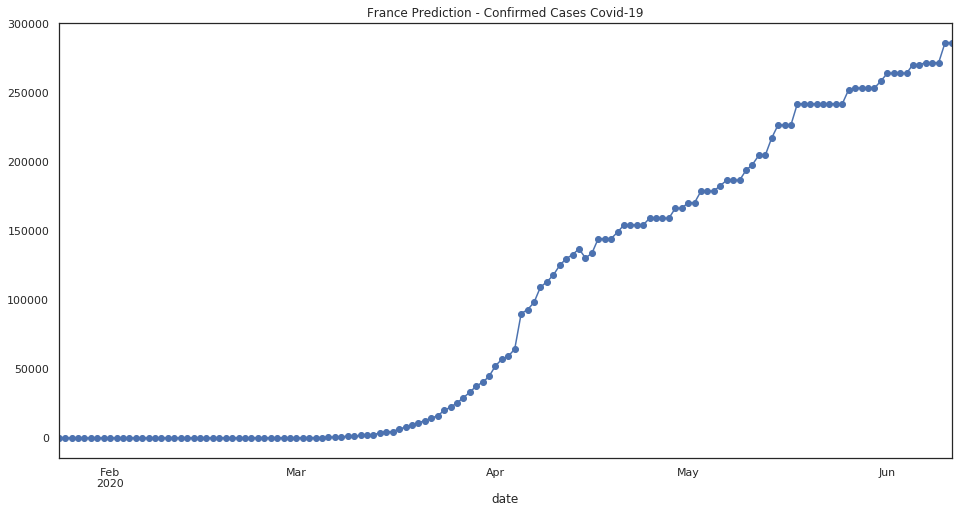

In [91]:
p9=pred['France_nan']
p9[2:].plot(marker='o',figsize=(16,8),title ='France Prediction - Confirmed Cases Covid-19')

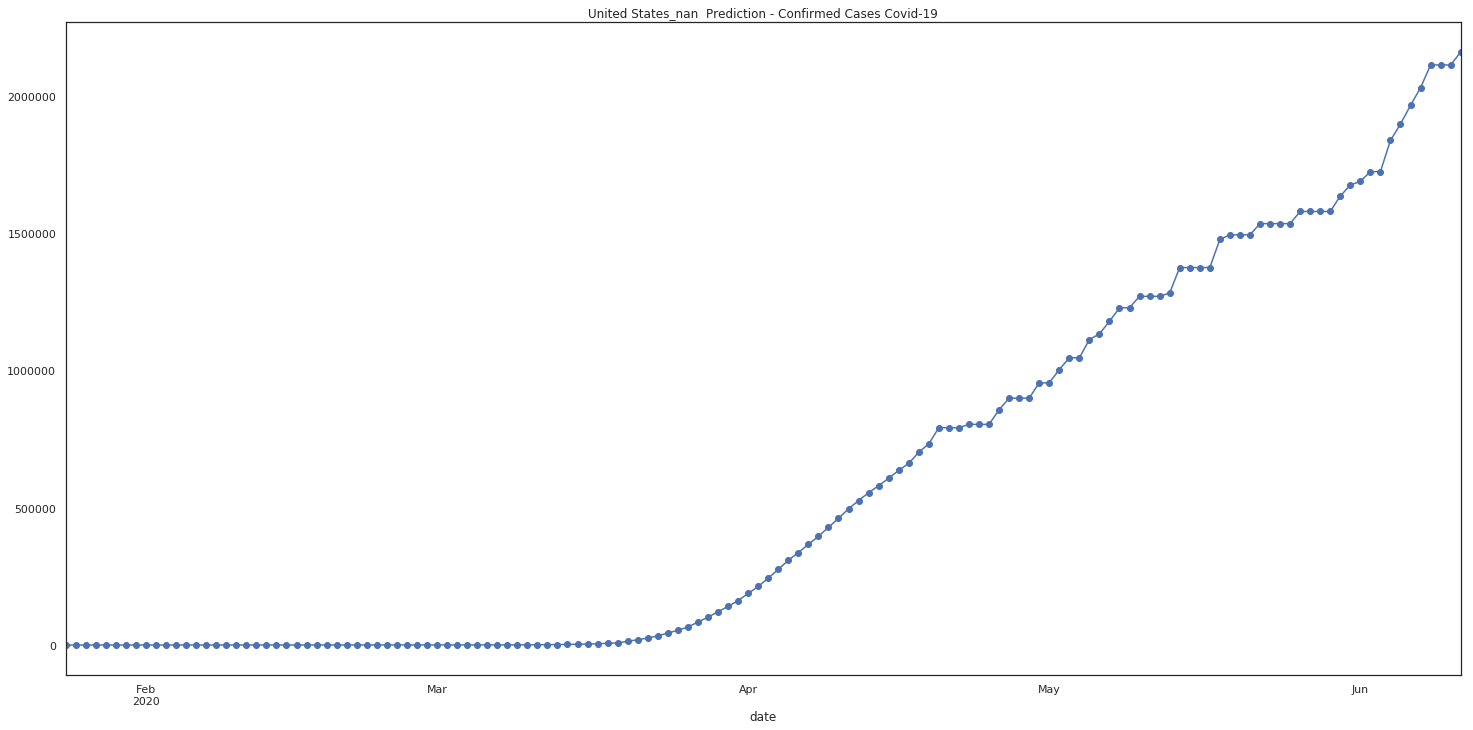

In [92]:
p10=pred['United States_nan']
p10[2:].plot(marker='o',figsize=(25,12),title ='United States_nan  Prediction - Confirmed Cases Covid-19')

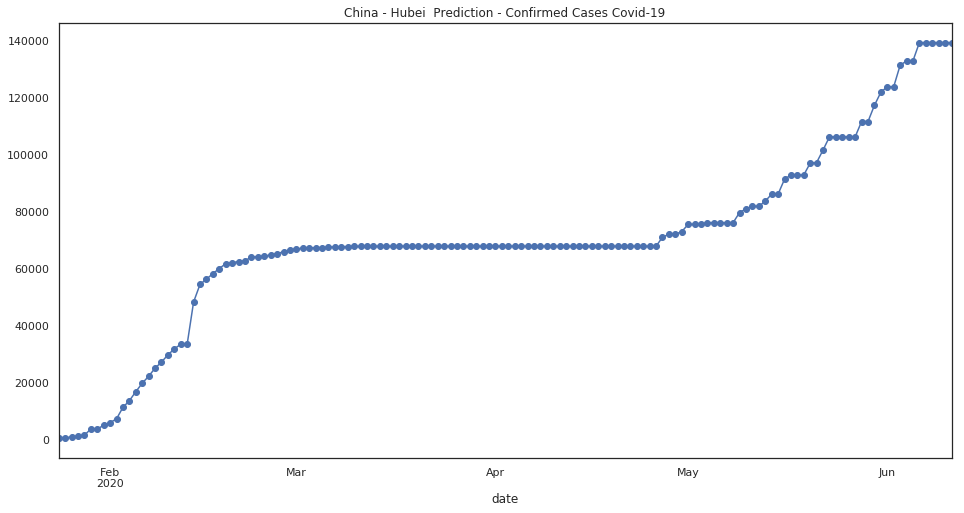

In [93]:
p11=pred['China_Hubei']
p11[2:].plot(marker='o',figsize=(16,8),title ='China - Hubei  Prediction - Confirmed Cases Covid-19')

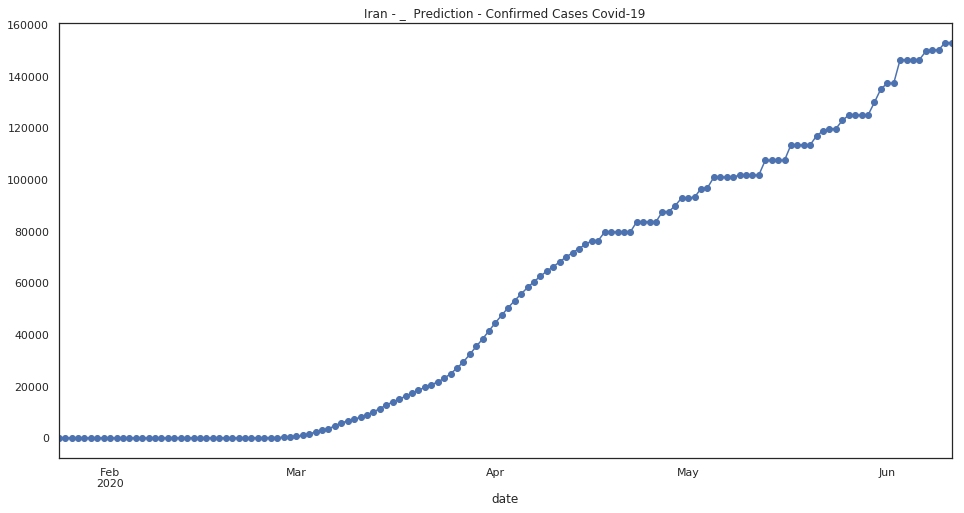

In [94]:
p12=pred['Iran_nan']
p12[2:].plot(marker='o',figsize=(16,8),title ='Iran - _  Prediction - Confirmed Cases Covid-19')

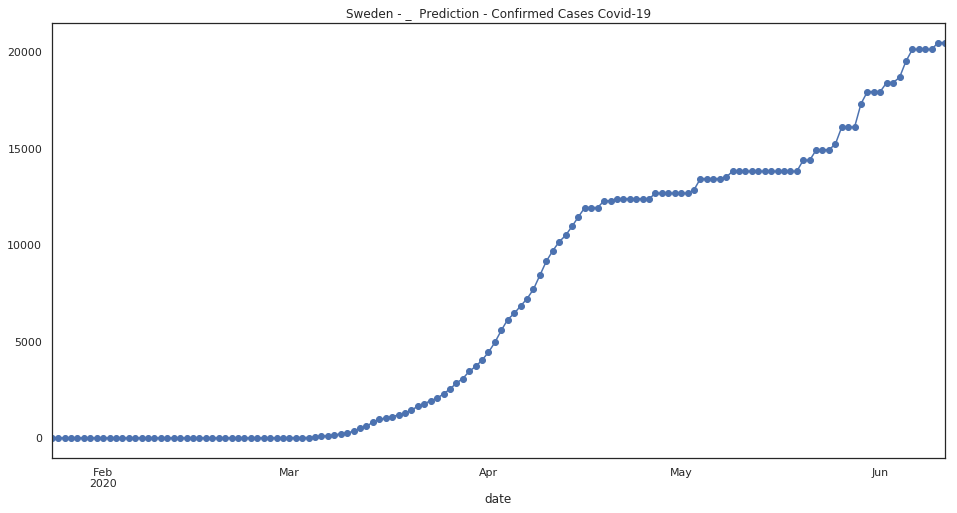

In [95]:
p13=pred['Sweden_nan']
p13[2:].plot(marker='o',figsize=(16,8),title ='Sweden - _  Prediction - Confirmed Cases Covid-19')

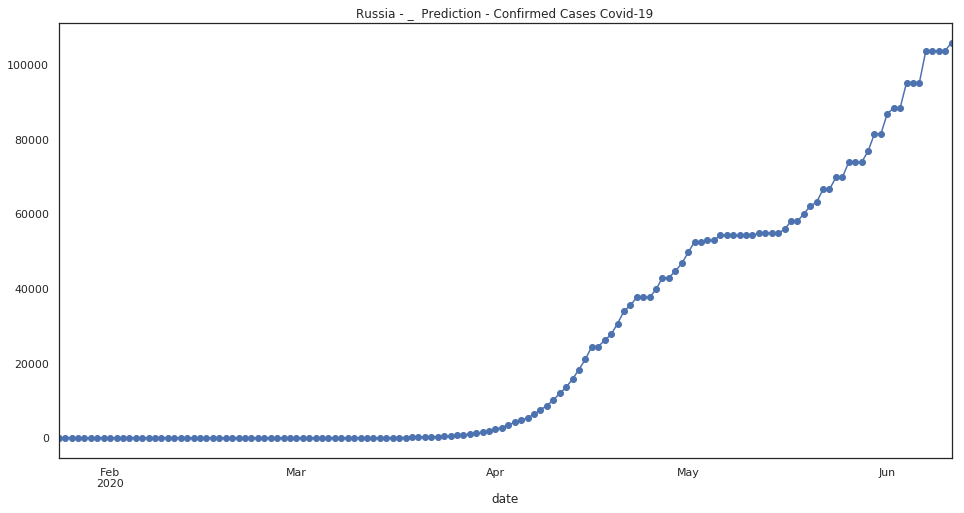

In [96]:
p13=pred['Russia_nan']
p13[2:].plot(marker='o',figsize=(16,8),title ='Russia - _  Prediction - Confirmed Cases Covid-19')

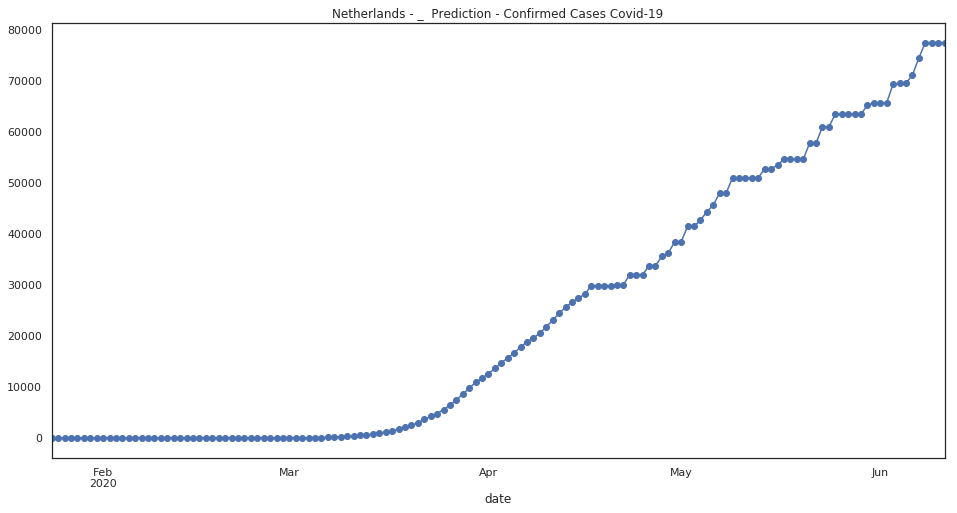

In [97]:
p14=pred['Netherlands_nan']
p14[2:].plot(marker='o',figsize=(16,8),title ='Netherlands - _  Prediction - Confirmed Cases Covid-19')

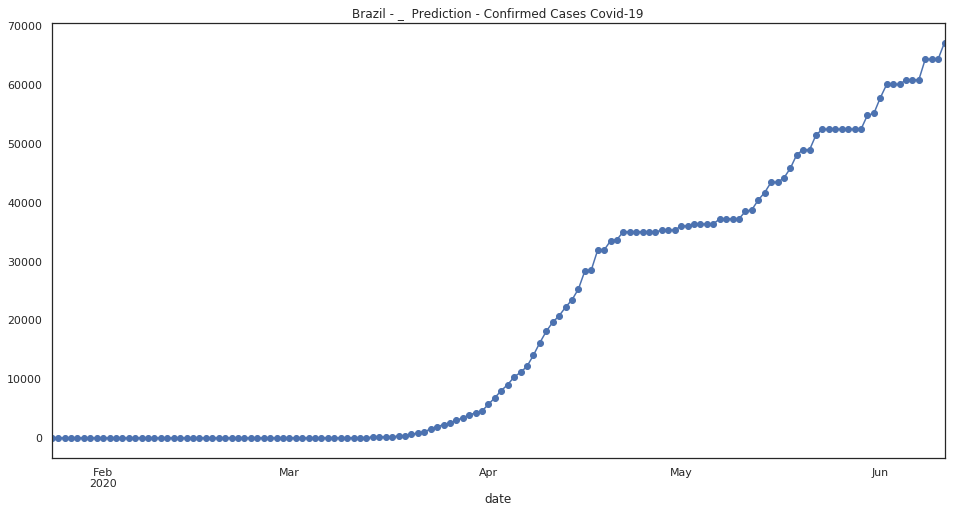

In [98]:
p15=pred['Brazil_nan']
p15[2:].plot(marker='o',figsize=(16,8),title ='Brazil - _  Prediction - Confirmed Cases Covid-19')

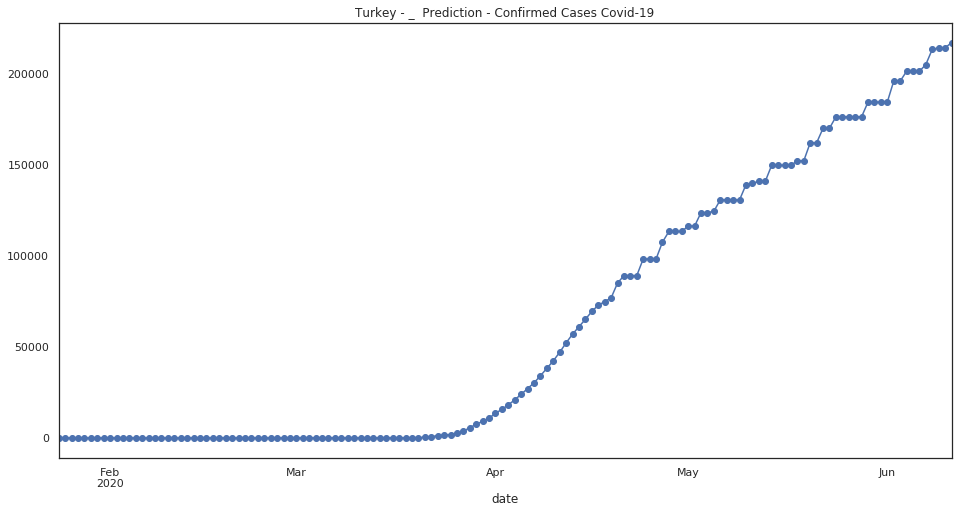

In [99]:
p15=pred['Turkey_nan']
p15[2:].plot(marker='o',figsize=(16,8),title ='Turkey - _  Prediction - Confirmed Cases Covid-19')

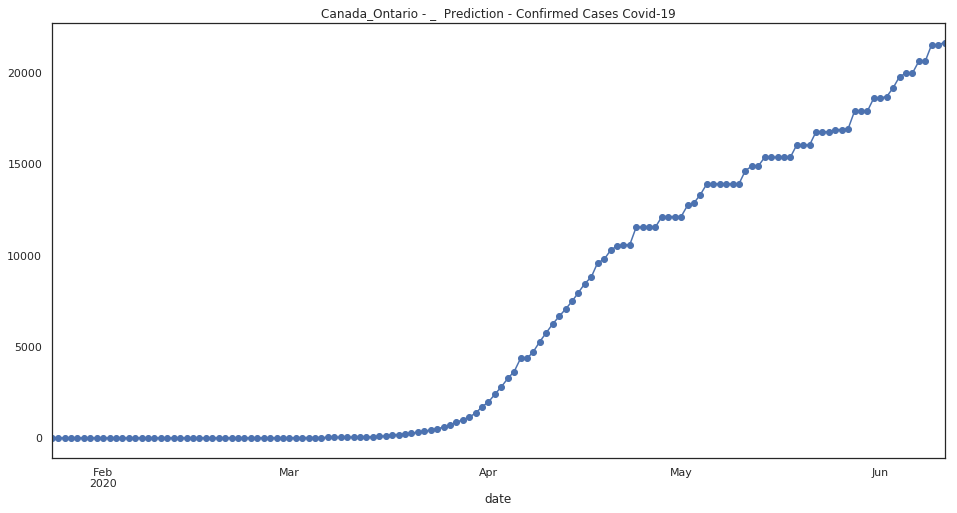

In [100]:
p16=pred['Canada_Ontario']
p16[2:].plot(marker='o',figsize=(16,8),title ='Canada_Ontario - _  Prediction - Confirmed Cases Covid-19')

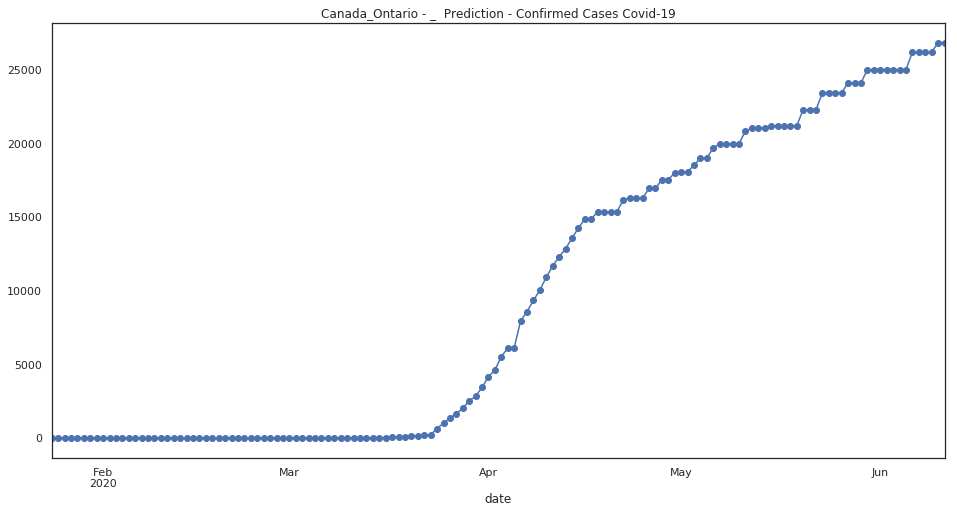

In [101]:
p17=pred['Canada_Quebec']
p17[2:].plot(marker='o',figsize=(16,8),title ='Canada_Ontario - _  Prediction - Confirmed Cases Covid-19')

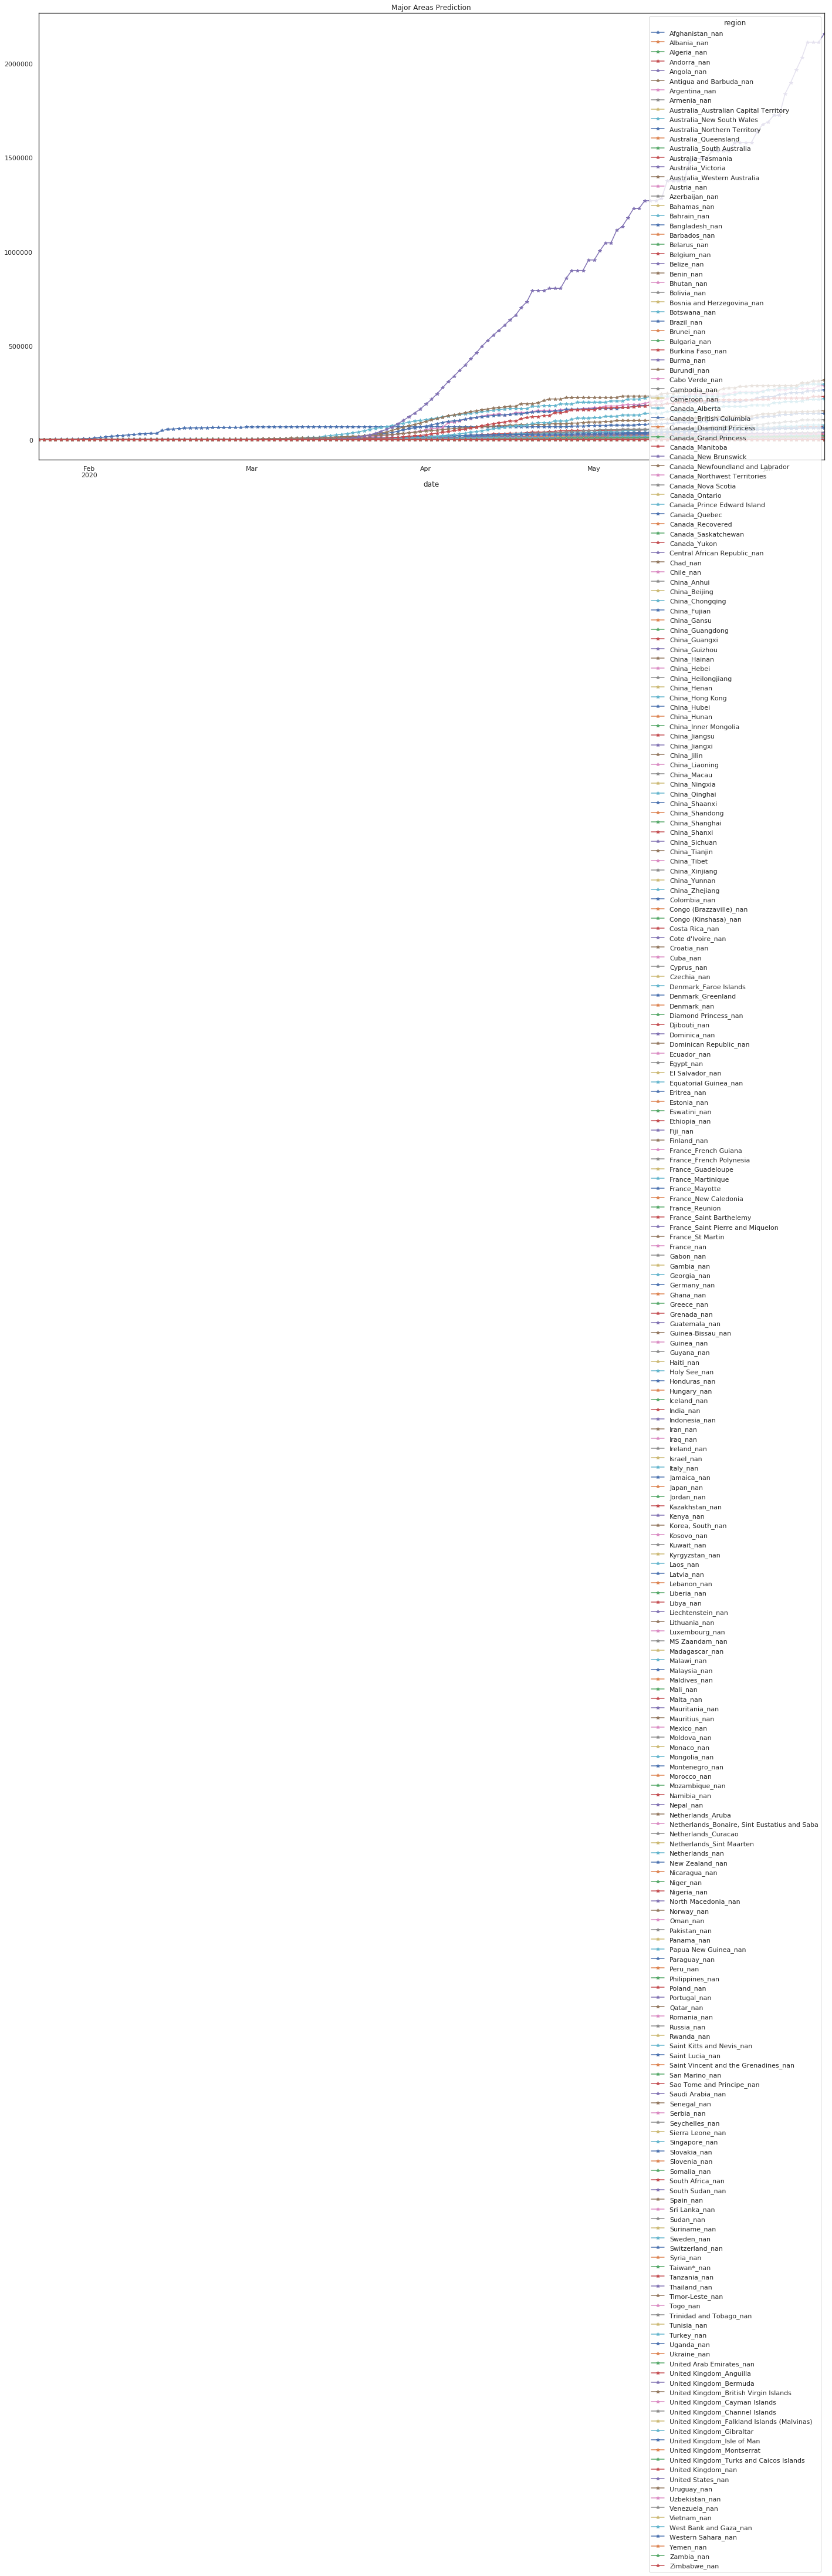

In [102]:
#region=my_train_list
pv2=pred
pv2[1:].plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

In [103]:
pv1=pv2[1:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)


## Prediction Heatmap

In [104]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-03-08              1.0          0.0         17.0          1.0   
2020-03-09              4.0          0.0         19.0          1.0   
2020-03-10              4.0          2.0         20.0          1.0   
2020-03-11              5.0         10.0         20.0          1.0   
2020-03-12              7.0         12.0         20.0          1.0   
2020-03-13              7.0         23.0         24.0          1.0   
2020-03-14              7.0         33.0         26.0          1.0   
2020-03-15             11.0         38.0         37.0          1.0   
2020-03-16             16.0         42.0         48.0          1.0   
2020-03-17             21.0         51.0         54.0          2.0   
2020-03-18             22.0         55.0         60.0         39.0   
2020-03-19             22.0         59.0         74.0         39.0   
2020-03-20             22.0         64.0         87.0         53.0   
2020-03-21             24.0         70.0         90.0         75.0   
2020-03-22             24.0         76.0        139.0         88.0   
2020-03-23             40.0         89.0        201.0        113.0   
2020-03-24             40.0        104.0        230.0        133.0   
2020-03-25             74.0        123.0        264.0        164.0   
2020-03-26             84.0        146.0        302.0        188.0   
2020-03-27             94.0        174.0        367.0        224.0   
2020-03-28            110.0        186.0        409.0        267.0   
2020-03-29            110.0        197.0        454.0        308.0   
2020-03-30            120.0        212.0        511.0        334.0   
2020-03-31            170.0        223.0        584.0        370.0   
2020-04-01            174.0        243.0        716.0        376.0   
2020-04-02            237.0        259.0        847.0        390.0   
2020-04-03            273.0        277.0        986.0        428.0   
2020-04-04            281.0        304.0       1171.0        439.0   
2020-04-05            299.0        333.0       1251.0        466.0   
2020-04-06            349.0        361.0       1320.0        501.0   
...                     ...          ...          ...          ...   
2020-05-13           1293.0        829.0       4626.0       1017.0   
2020-05-14           1378.0        838.0       4631.0       1068.0   
2020-05-15           1378.0        838.0       4631.0       1068.0   
2020-05-16           1378.0        838.0       4998.0       1068.0   
2020-05-17           1461.0        838.0       4998.0       1126.0   
2020-05-18           1492.0        868.0       4998.0       1153.0   
2020-05-19           1538.0        900.0       4998.0       1153.0   
2020-05-20           1538.0        922.0       5134.0       1240.0   
2020-05-21           1538.0        922.0       5134.0       1245.0   
2020-05-22           1558.0        927.0       5153.0       1245.0   
2020-05-23           1609.0        949.0       5153.0       1245.0   
2020-05-24           1609.0        949.0       5433.0       1332.0   
2020-05-25           1609.0        960.0       5433.0       1372.0   
2020-05-26           1609.0       1022.0       5678.0       1372.0   
2020-05-27           1609.0       1022.0       5902.0       1372.0   
2020-05-28           1674.0       1022.0       5902.0       1408.0   
2020-05-29           1674.0       1022.0       5902.0       1408.0   
2020-05-30           1674.0       1022.0       6280.0       1423.0   
2020-05-31           1674.0       1058.0       6280.0       1443.0   
2020-06-01           1674.0       1058.0       6375.0       1443.0   
2020-06-02           1737.0       1123.0       6375.0       1443.0   
2020-06-03           1737.0       1123.0       6531.0       1486.0   
2020-06-04           1737.0       1123.0       6531.0       1486.0   
2020-06-05           1737.0       1123.0       6531.0       1486.0   
2020-06-06

In [105]:
p.to_csv('/home/notebookuser/notebooks/covid19/data/p_confirmed_daily.csv', index = False, header=True)

In [106]:

#!pip install gmplot

In [107]:
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [108]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')

In [109]:
heatmap_m[:]

region        Lat        Long  \
0                                 Afghanistan_nan  33.000000   65.000000   
1                                     Albania_nan  41.153300   20.168300   
2                                     Algeria_nan  28.033900    1.659600   
3                                     Andorra_nan  42.506300    1.521800   
4                                      Angola_nan -11.202700   17.873900   
5                         Antigua and Barbuda_nan  17.060800  -61.796400   
6                                   Argentina_nan -38.416100  -63.616700   
7                                     Armenia_nan  40.069100   45.038200   
8          Australia_Australian Capital Territory -35.473500  149.012400   
9                       Australia_New South Wales -33.868800  151.209300   
10                   Australia_Northern Territory -12.463400  130.845600   
11                           Australia_Queensland -28.016700  153.400000   
12                      Australia_South Australia -34.928500  138.600700   
13                             Australia_Tasmania -41.454500  145.970700   
14                             Australia_Victoria -37.813600  144.963100   
15                    Australia_Western Australia -31.950500  115.860500   
16                                    Austria_nan  47.516200   14.550100   
17                                 Azerbaijan_nan  40.143100   47.576900   
18                                    Bahamas_nan  25.034300  -77.396300   
19                                    Bahrain_nan  26.027500   50.550000   
20                                 Bangladesh_nan  23.685000   90.356300   
21                                   Barbados_nan  13.193900  -59.543200   
22                                    Belarus_nan  53.709800   27.953400   
23                                    Belgium_nan  50.833300    4.000000   
24                                      Benin_nan   9.307700    2.315800   
25                                     Bhutan_nan  27.514200   90.433600   
26                                    Bolivia_nan -16.290200  -63.588700   
27                     Bosnia and Herzegovina_nan  43.915900   17.679100   
28                                     Brazil_nan -14.235000  -51.925300   
29                                     Brunei_nan   4.535300  114.727700   
..                                            ...        ...         ...   
237                                Mozambique_nan -18.665695   35.529562   
238                                     Syria_nan  34.802075   38.996815   
239                               Timor-Leste_nan  -8.874217  125.727539   
240                                    Belize_nan  13.193900  -59.543200   
241                              Canada_Recovered   0.000000    0.000000   
242                                      Laos_nan  19.856270  102.495496   
243                                     Libya_nan  26.335100   17.228331   
244                        West Bank and Gaza_nan  31.952200   35.233200   
245                             Guinea-Bissau_nan  11.803700  -15.180400   
246                                      Mali_nan  17.570692   -3.996166   
247                     Saint Kitts and Nevis_nan  17.357822  -62.782998   
248                  Canada_Northwest Territories  64.825500 -124.845700   
249                                  Canada_Yukon  64.282300 -135.000000   
250                                    Kosovo_nan  42.602636   20.902977   
251                                     Burma_nan  21.916200   95.956000   
252                       United Kingdom_Anguilla  18.220600  -63.068600   
253         United Kingdom_British Virgin Islands  18.420700  -64.640000   
254       United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
255                                MS Zaandam_nan   0.000000    0.000000   
256                                  Botswana_nan -22.328500   24.684900   
257                                   Burundi_nan  -3.373100   29.918900   
258            

In [110]:
heatmap=pd.DataFrame()
vmaxni=len(heatmap_m)
vmaxnii=(vmaxni)-2
for i in range(0,len(heatmap)):
    if heatmap_m.iloc[i,vmaxni].astype(int)==0:     #### heatmap_m.iloc[i,61] # heatmap_m.iloc[i,9] columns is the date we want to check
        continue
    #heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:3]]*abs(heatmap_m.iloc[i,(i+1)].astype(int)), ignore_index=True,sort=False)) 
    heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:vmaxnii]]*abs(heatmap_m.iloc[i:(i+1),1:vmaxnii].astype(int)), ignore_index=True,sort=False)) 


In [111]:
### Joao - Print in datetime
from datetime import datetime
#
latitudes = heatmap_m['Lat']
longitudes = heatmap_m['Long']
# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
heatmap=heatmap_m
gmap = gmplot.GoogleMapPlotter(46.99474,6.87237, 4)
gmap.heatmap(latitudes, longitudes)
datemap=datetime.today().strftime('%Y-%m-%d')
# Generate the heatmap into an HTML file
gmap.draw("heatmaps/Heatmap-"+datemap+".html")

In [112]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March and now April!")
print(" April-May-June are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March and now April!
 April-May-June are going to be hard with this Global Lock-Down!


In [113]:
exit()